## Author: A. N. M. Sajedul Alam

## Goal: Data Extraction from PDF files of Resume

### Implemented on 6 different resumes randomly collected from web

#### Mounting my google drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Installing poppler utils for manipulating PDF files and converting them to other formats.

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.14 [154 kB]
Fetched 154 kB in 0s (404 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.14_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.14) ...
Setting up poppler-utils (0.62.0-2ubuntu2.14) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


#### Installing pdf2image and easyocr for converting pdf to image and for optical character recognition

In [2]:
!pip install pdf2image
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 47.6 MB 1.3 MB/s 
     |████████████████████████████████| 604 kB 48.8 MB/s 
     |████████████████████████████████| 120 kB 47.8 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


#### Installing spacy for doing advanced natural language processing tasks and pillow's imageDraw module for getting simple 2D graphics for image objects.

In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

#### For working with English language specifically on resumes

In [4]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

## Working on Resume Sample 1

#### Converting PDF to Images

In [6]:
images = convert_from_path('/content/drive/MyDrive/Resume Parser From PDF File/Sample Resumes/1.pdf')

#### Displaying image

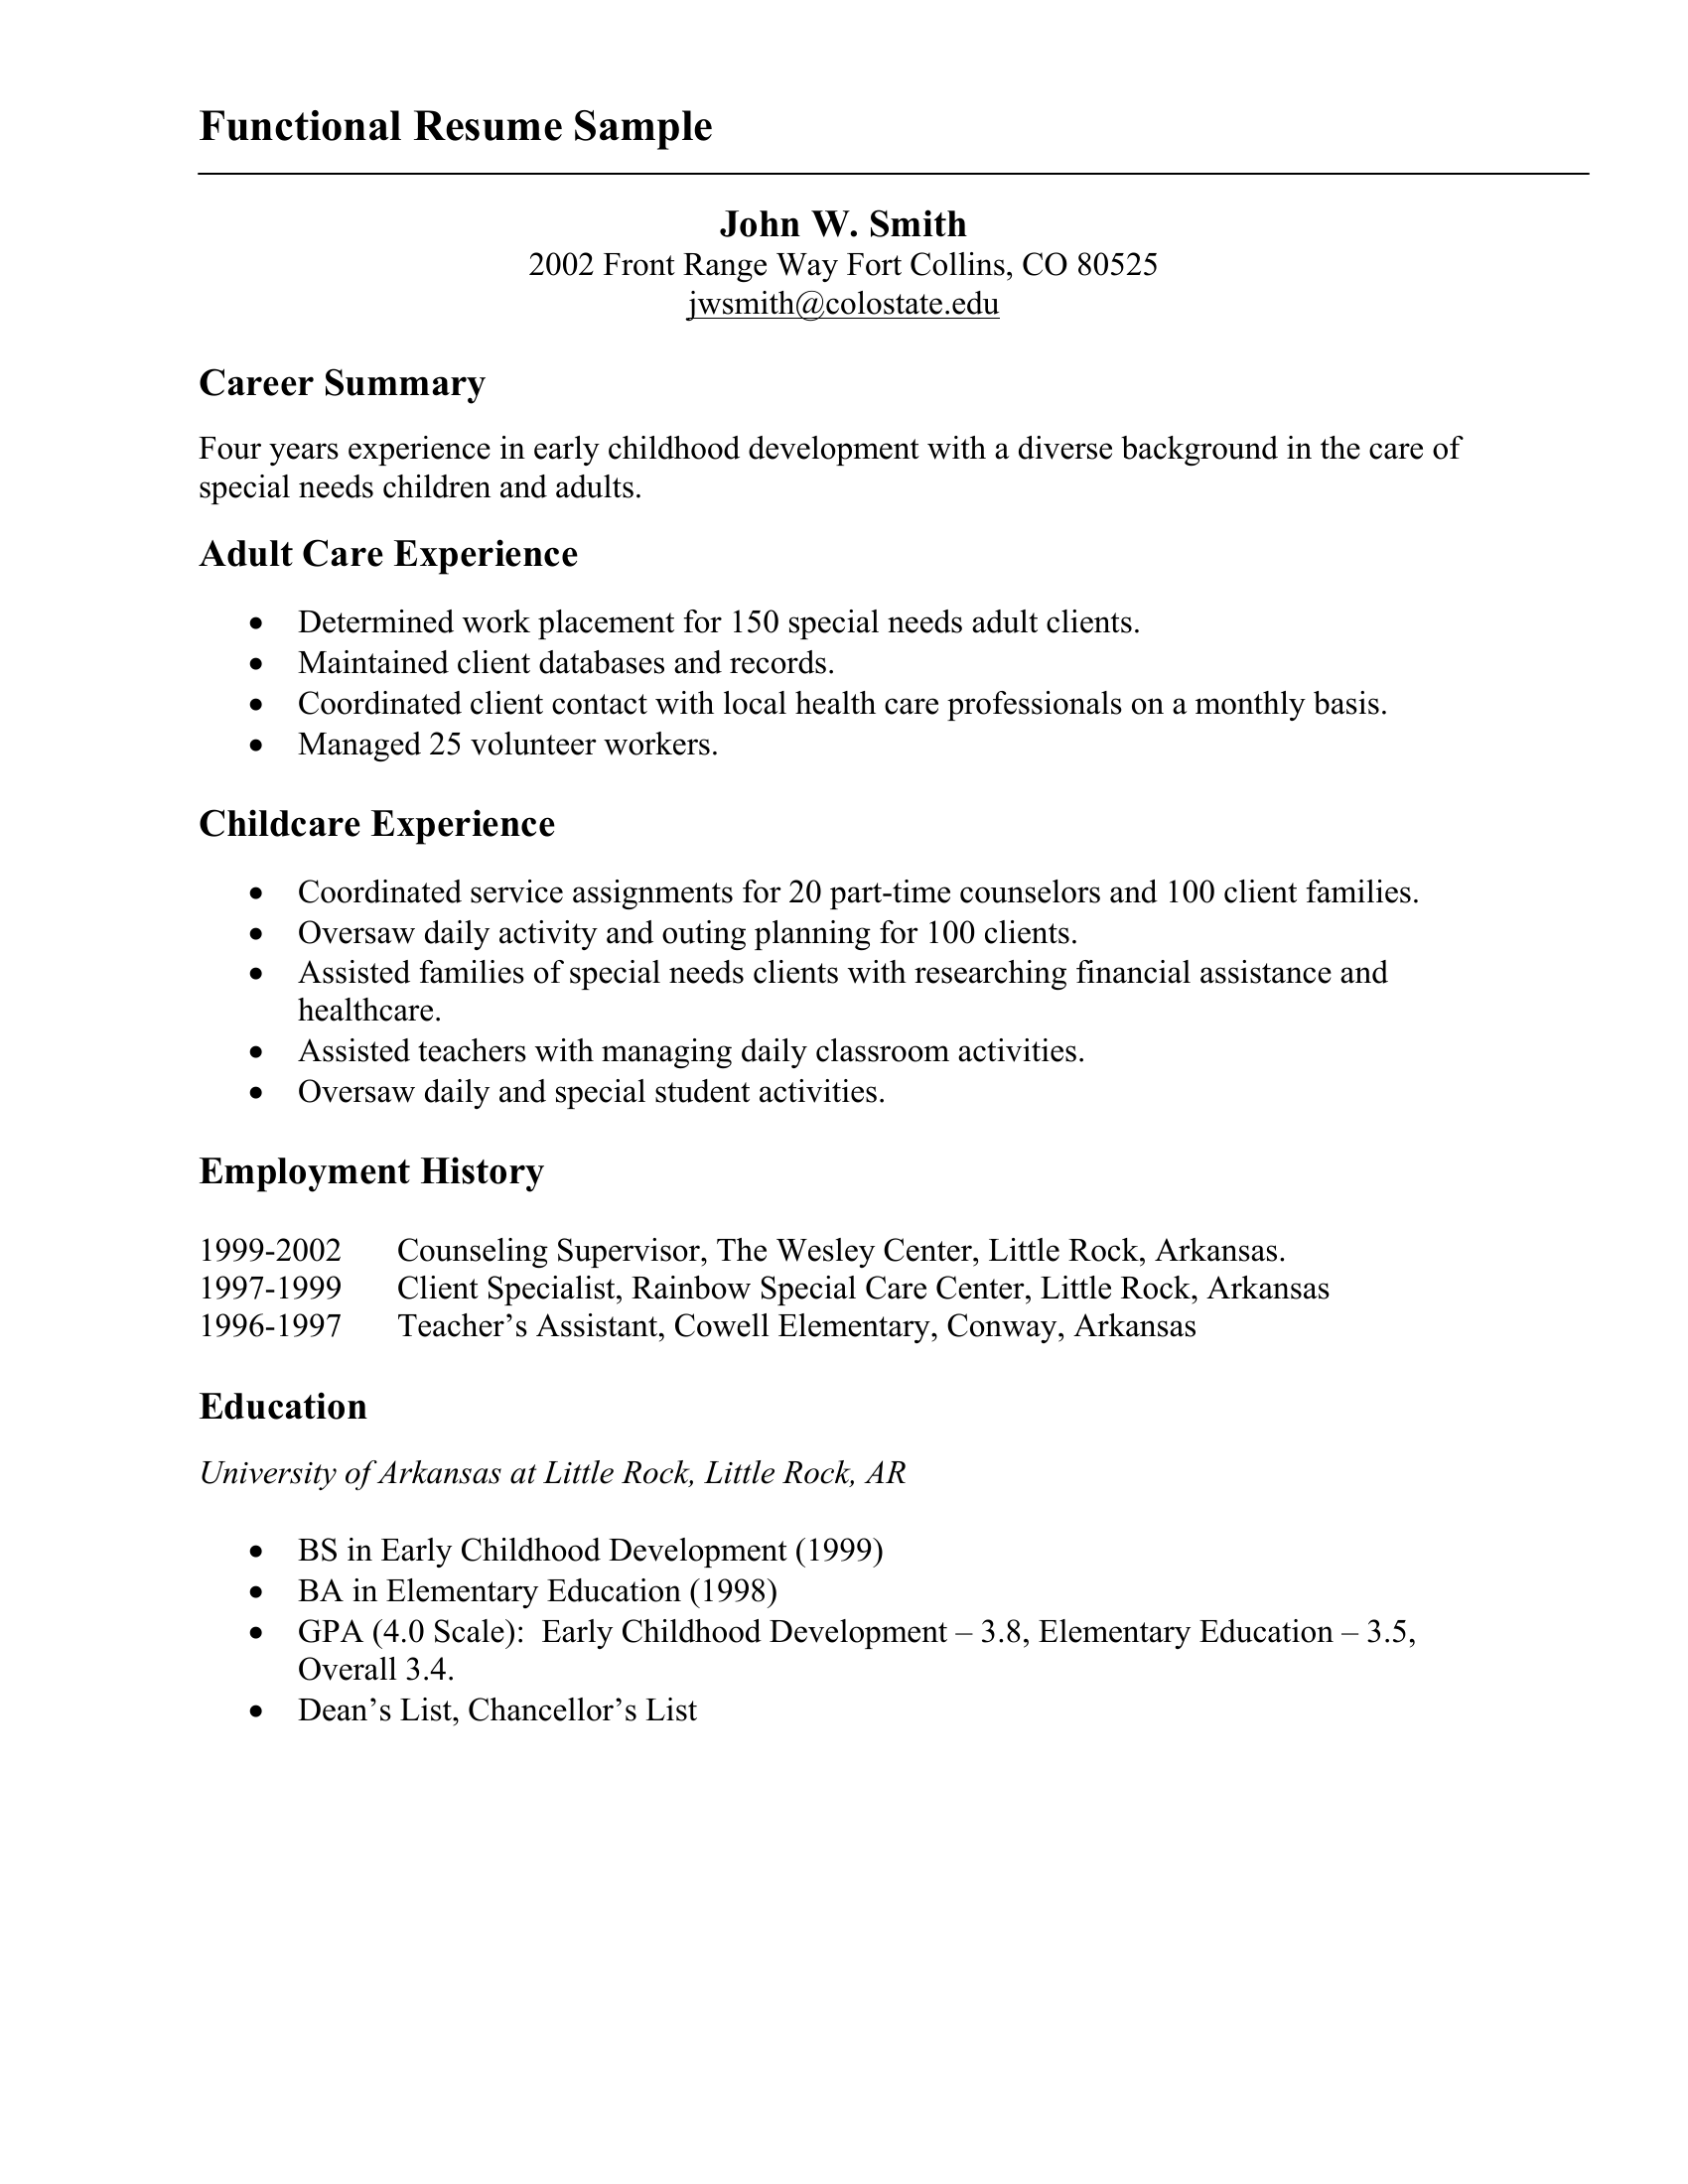

In [7]:
from IPython.display import display, Image
display(images[0])

In [8]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[194, 102], [726, 102], [726, 159], [194, 159]],
  'Functional Resume Sample',
  0.9685980985090238),
 ([[721, 205], [979, 205], [979, 245], [721, 245]],
  'John W. Smith',
  0.7163713319811338),
 ([[529, 247], [1171, 247], [1171, 291], [529, 291]],
  '2002 Front Range Way Fort Collins, CO 80525',
  0.8755310433747879),
 ([[688, 285], [1013, 285], [1013, 327], [688, 327]],
  'iwsmith@colostate_edu',
  0.6196214560138341),
 ([[196, 362], [497, 362], [497, 414], [196, 414]],
  'Career Summary',
  0.9999405627330936),
 ([[196, 430], [1480, 430], [1480, 478], [196, 478]],
  'Four years experience in early childhood development with a diverse background in the care of',
  0.7469068906154114),
 ([[192, 467], [649, 467], [649, 519], [192, 519]],
  'special needs children and adults',
  0.993263242299866),
 ([[198, 536], [590, 536], [590, 586], [198, 586]],
  'Adult Care Experience',
  0.9534088645751743),
 ([[296, 604], [1152, 604], [1152, 654], [296, 654]],
  'Determined work placement fo

#### Drawing boxes over information

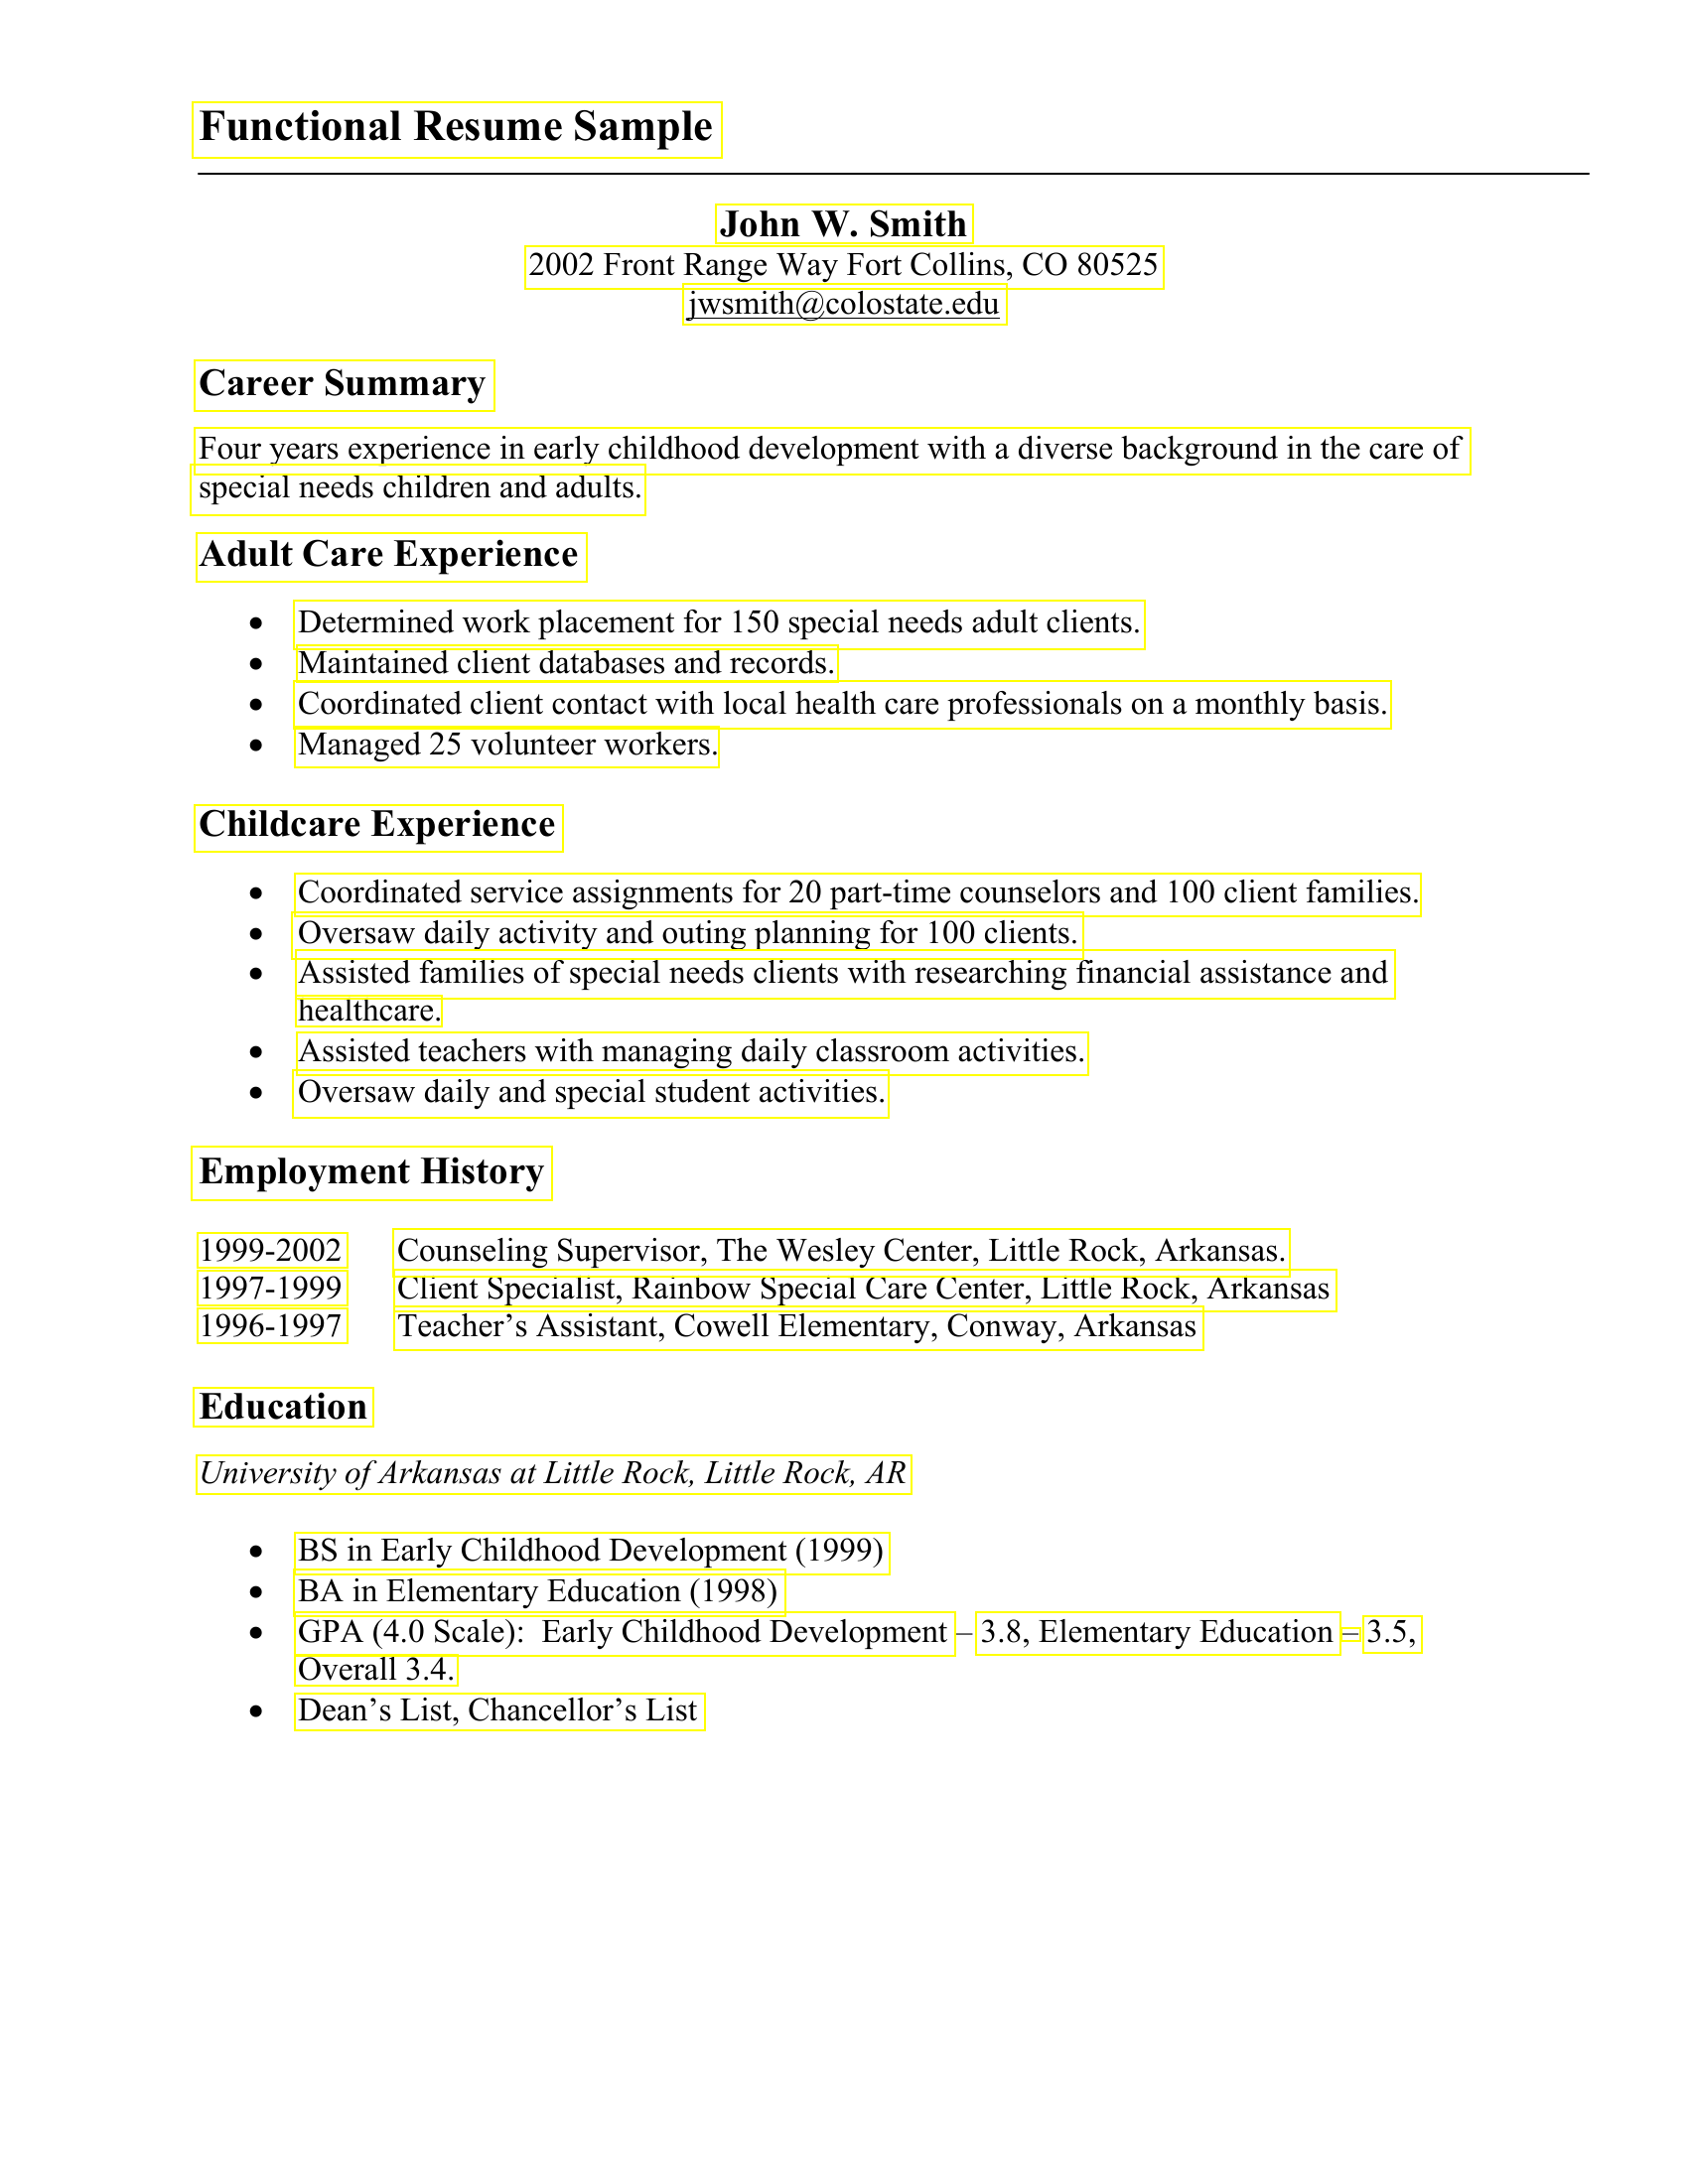

In [9]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [10]:
bounds[1][1]

'John W. Smith'

#### Displaying all texts

In [11]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Functional Resume Sample
John W. Smith
2002 Front Range Way Fort Collins, CO 80525
iwsmith@colostate_edu
Career Summary
Four years experience in early childhood development with a diverse background in the care of
special needs children and adults
Adult Care Experience
Determined work placement for 150 special needs adult clients.
Maintained client databases and records.
Coordinated client contact with local health care professionals o a monthly basis.
Managed 25 volunteer workers.
Childcare Experience
Coordinated service assignments for 20 part-time counselors and 100 client families
Oversaw daily activity and outing planning for 100 clients.
Assisted families of special needs clients with researching financial assistance and
healthcare.
Assisted teachers with managing daily classroom activities.
Oversaw daily and special student activities
Employment History
1999-2002
Counseling Supervisor; The Wesley Center, Little Rock Arkansas
1997-1999
Client Specialist; Rainbow Special Care Cent

In [12]:
nlp=spacy.load('en_core_web_sm')

In [13]:
doc = nlp(text)

#### Displaying info

In [14]:
from spacy import displacy

displacy.render(nlp(doc.text),style='ent', jupyter=True)

## Working on Resume Sample 2

#### Converting PDF to Images

In [15]:
images = convert_from_path('/content/drive/MyDrive/Resume Parser From PDF File/Sample Resumes/2.pdf')

#### Displaying image

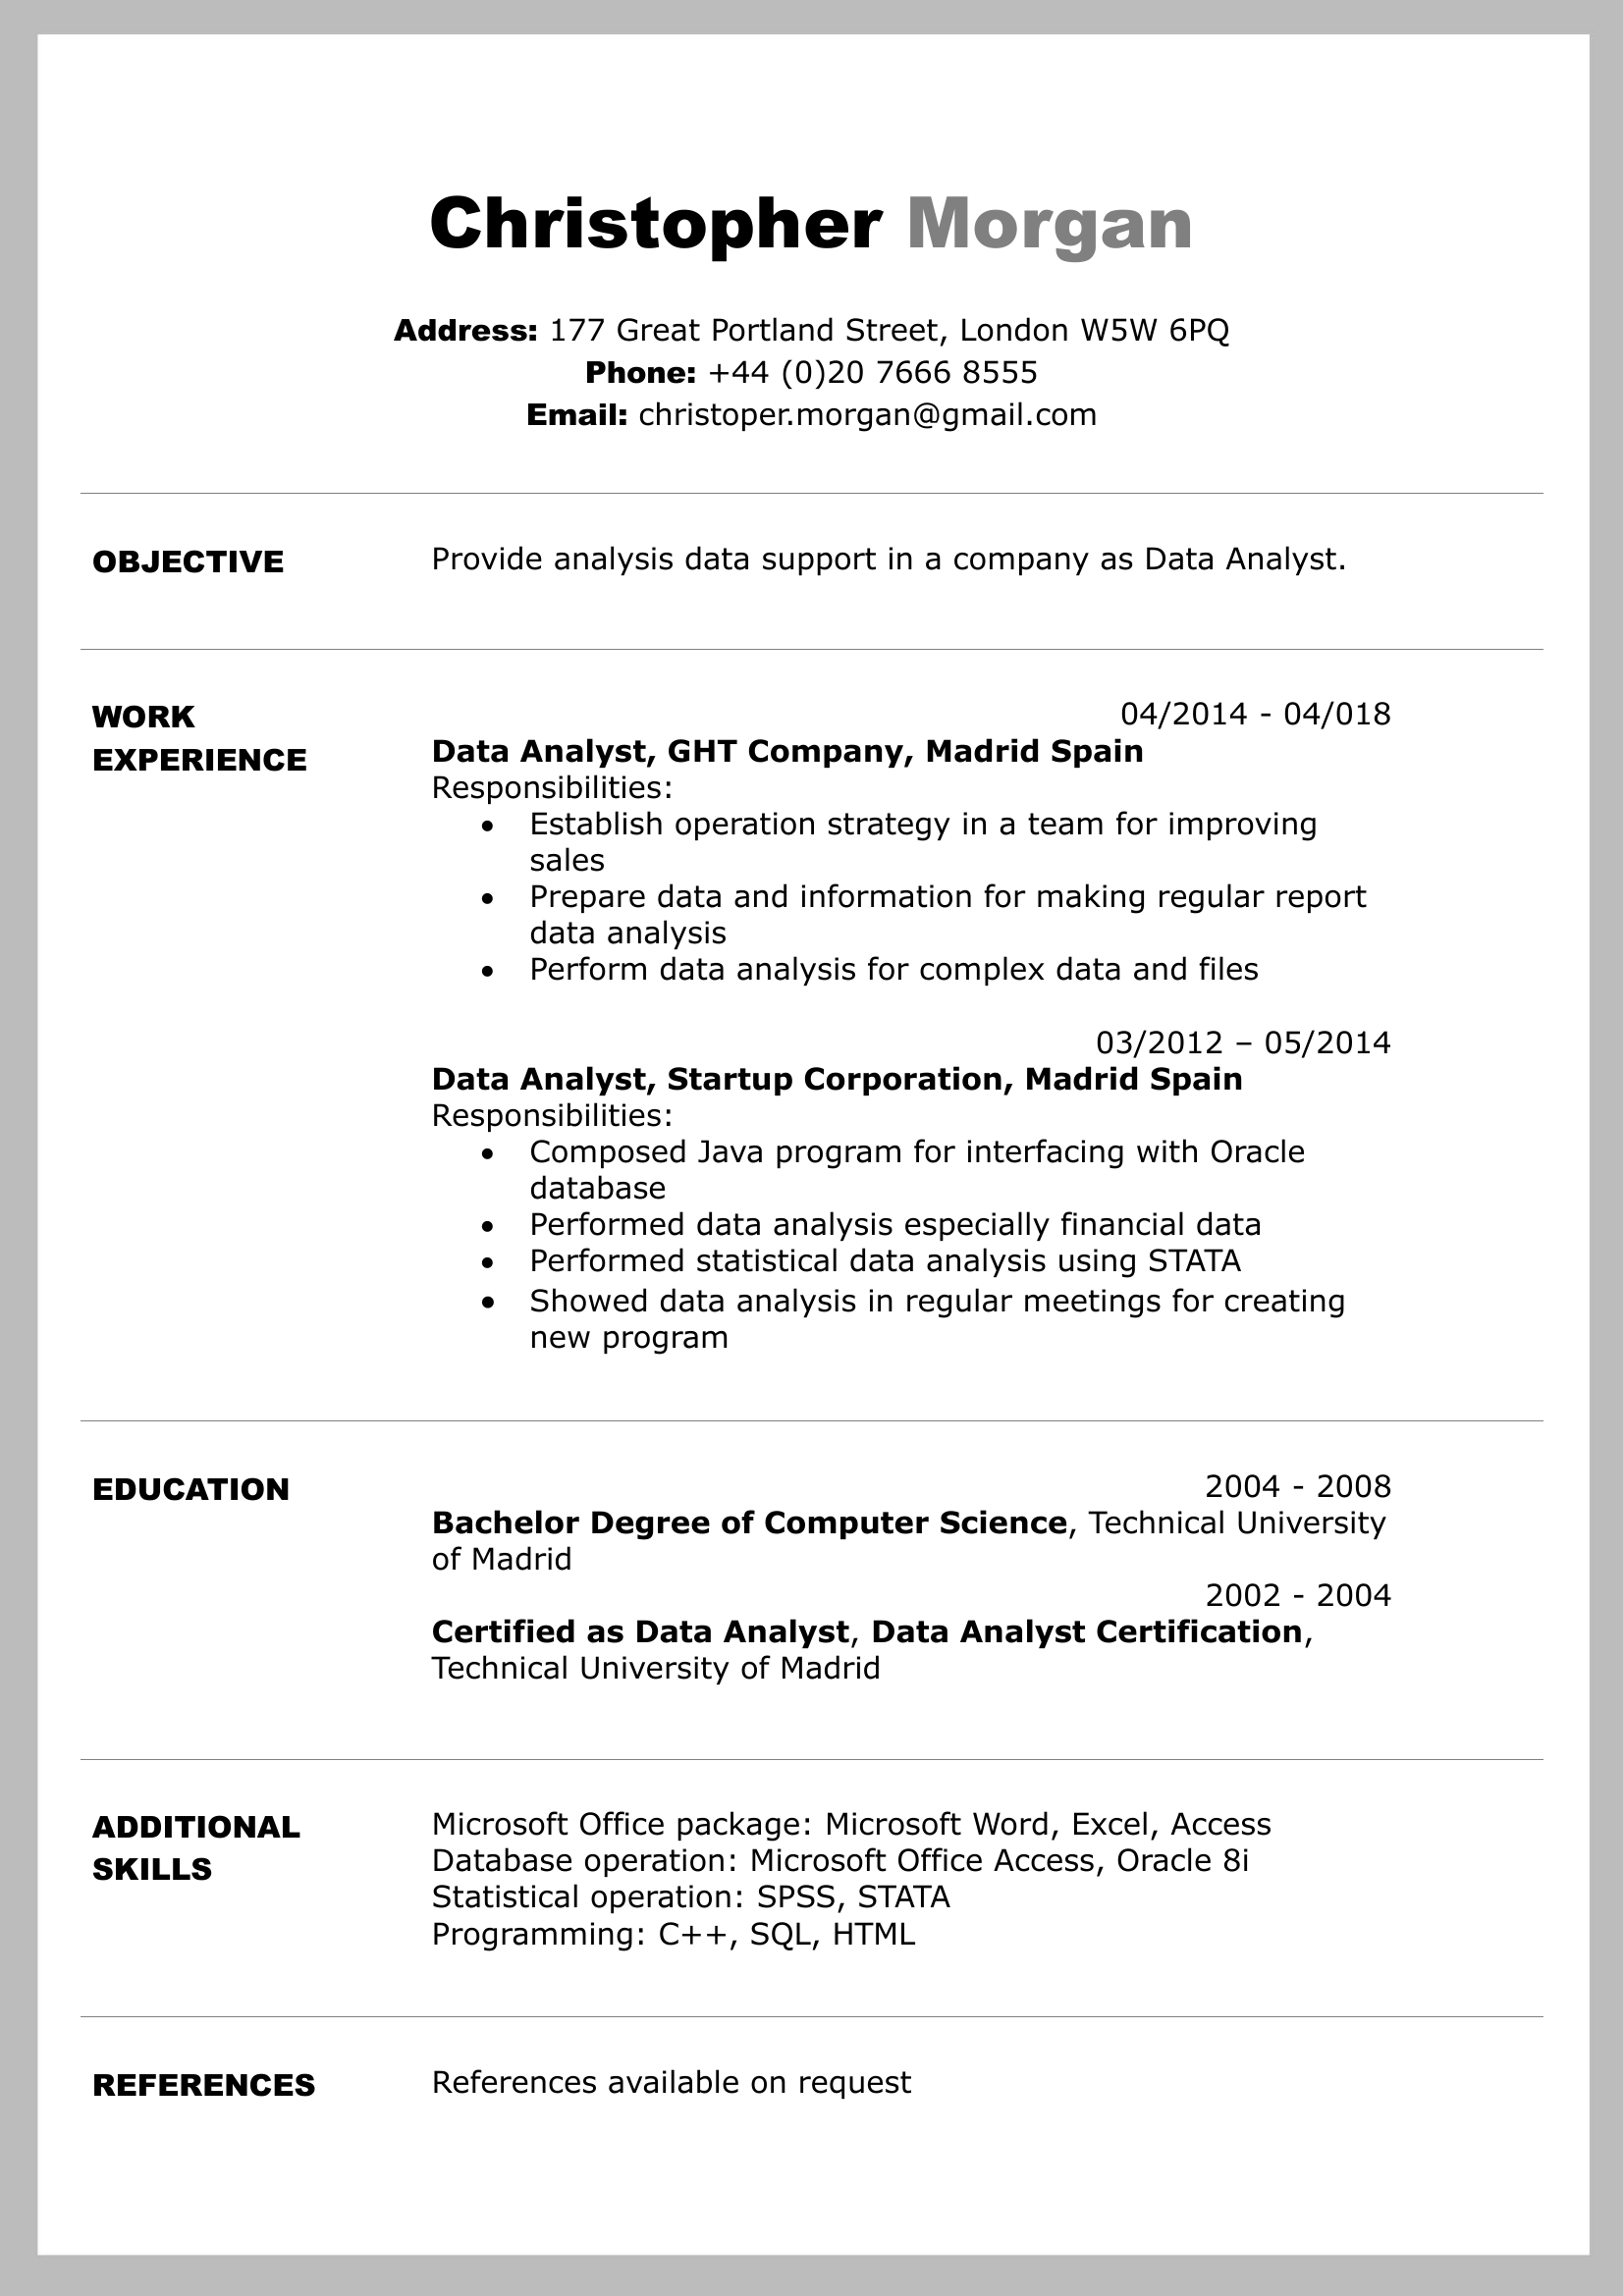

In [16]:
from IPython.display import display, Image
display(images[0])

In [17]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[431, 185], [1227, 185], [1227, 281], [431, 281]],
  'Christopher Morgan',
  0.9999253079929702),
 ([[398, 318], [1257, 318], [1257, 359], [398, 359]],
  'Address: 177 Great Portland Street, London WSW 6PQ',
  0.8756633273816566),
 ([[595, 361], [1063, 361], [1063, 403], [595, 403]],
  'Phone: +44 (0)20 7666 8555',
  0.7388734038104049),
 ([[535, 405], [1121, 405], [1121, 447], [535, 447]],
  'Email: christoper morgan@gmail.com',
  0.6188902048183881),
 ([[90, 554], [294, 554], [294, 590], [90, 590]],
  'OBJECTIVE',
  0.9993863356310615),
 ([[437, 551], [1371, 551], [1371, 595], [437, 595]],
  'Provide analysis data support in a company as Data Analyst.',
  0.6115448206605172),
 ([[94, 714], [202, 714], [202, 746], [94, 746]], 'WORK', 0.9991289377212524),
 ([[1138, 707], [1277, 707], [1277, 748], [1138, 748]],
  '04/2014',
  0.9999992790898953),
 ([[1303, 709], [1423, 709], [1423, 747], [1303, 747]],
  '04/018',
  0.9808922413239726),
 ([[93, 757], [319, 757], [319, 793], [93, 793]]

In [18]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

#### Drawing boxes

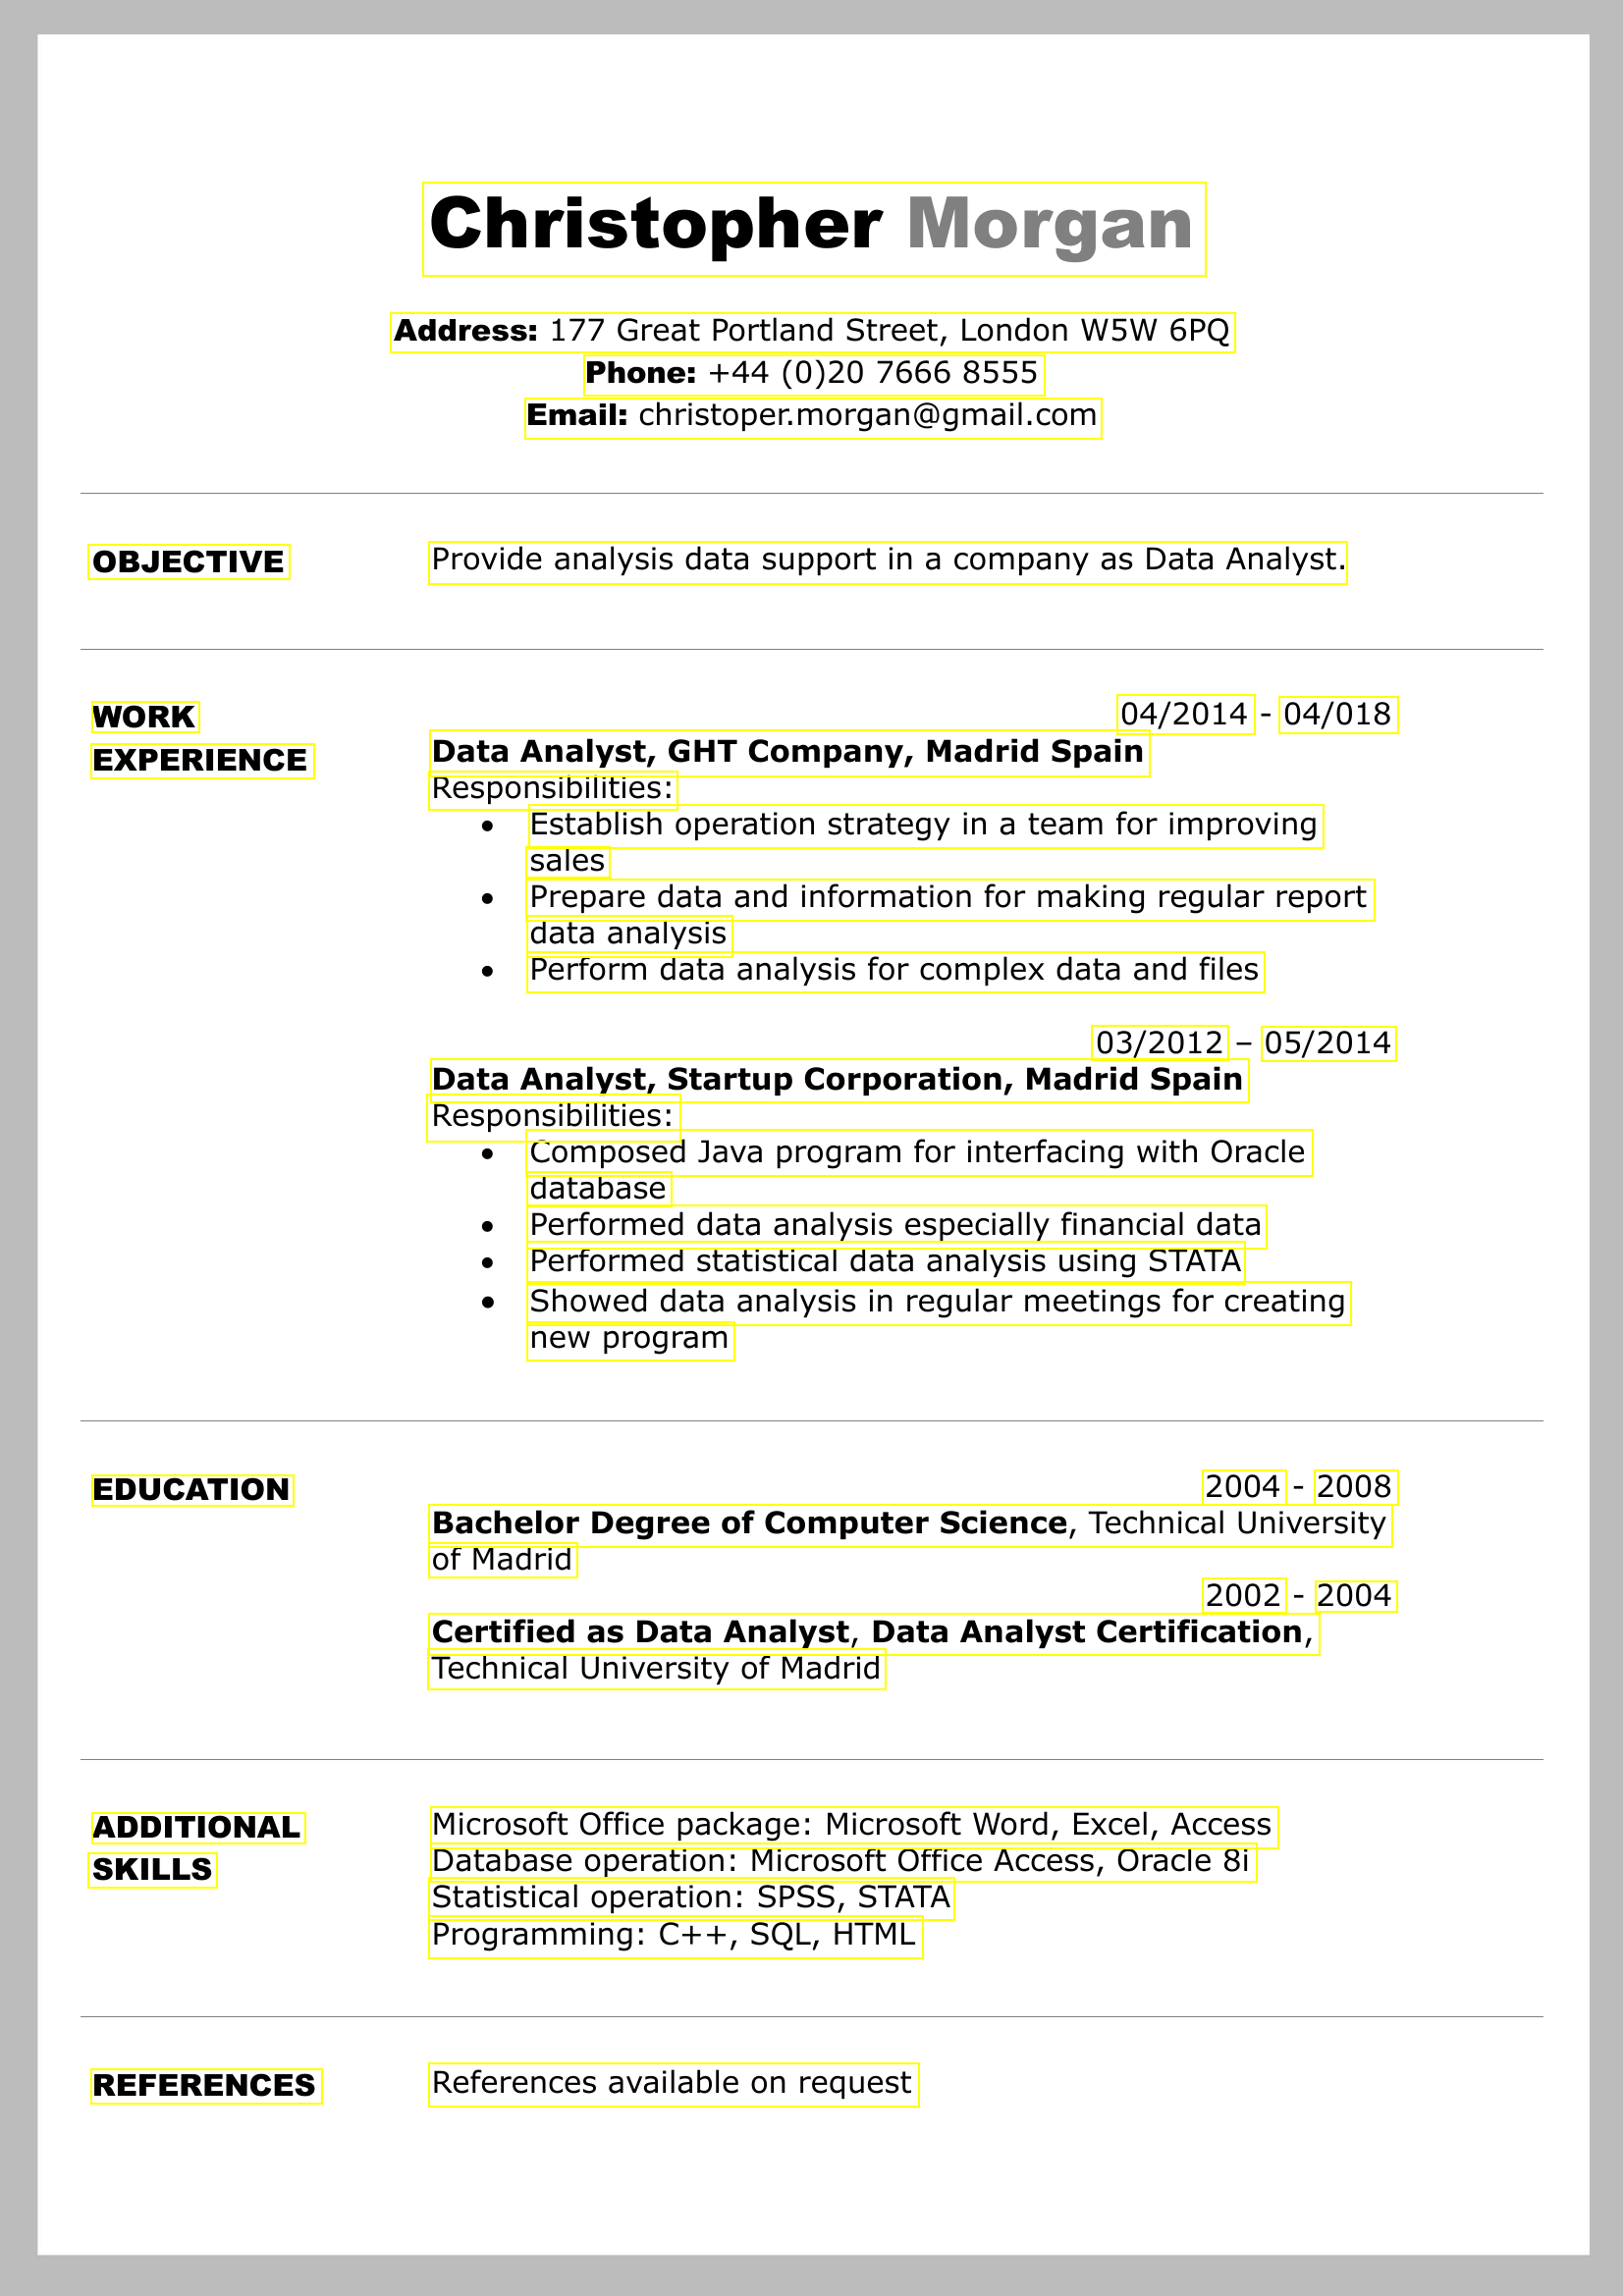

In [19]:
draw_boxes(images[0], bounds)

In [20]:
bounds[1][1]

'Address: 177 Great Portland Street, London WSW 6PQ'

In [21]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

#### Displaying all texts

In [22]:
print(text)

Christopher Morgan
Address: 177 Great Portland Street, London WSW 6PQ
Phone: +44 (0)20 7666 8555
Email: christoper morgan@gmail.com
OBJECTIVE
Provide analysis data support in a company as Data Analyst.
WORK
04/2014
04/018
EXPERIENCE
Data Analyst, GHT Company, Madrid Spain
Responsibilities:
Establish operation strategy in a team for improving
sales
Prepare data and information for making regular report
data analysis
Perform data analysis for complex data and files
03/2012
05/2014
Data Analyst, Startup Corporation, Madrid Spain
Responsibilities:
Composed Java program for interfacing with Oracle
database
Performed data analysis especially financial data
Performed statistical data analysis using STATA
Showed data analysis in regular meetings for creating
new program
EDUCATION
2004
2008
Bachelor Degree of Computer Science, Technical University
of Madrid
2002
2004
Certified as Data Analyst, Data Analyst Certification,
Technical University of Madrid
ADDITIONAL
Microsoft Office package: Micros

In [23]:
nlp=spacy.load('en_core_web_sm')

In [24]:
doc = nlp(text)

#### Displaying info

In [25]:
from spacy import displacy
displacy.render(nlp(doc.text),style='ent', jupyter=True)

## Working on Resume Sample 3

#### Converting PDF to Images

In [26]:
images = convert_from_path('/content/drive/MyDrive/Resume Parser From PDF File/Sample Resumes/3.pdf')

#### Displaying image

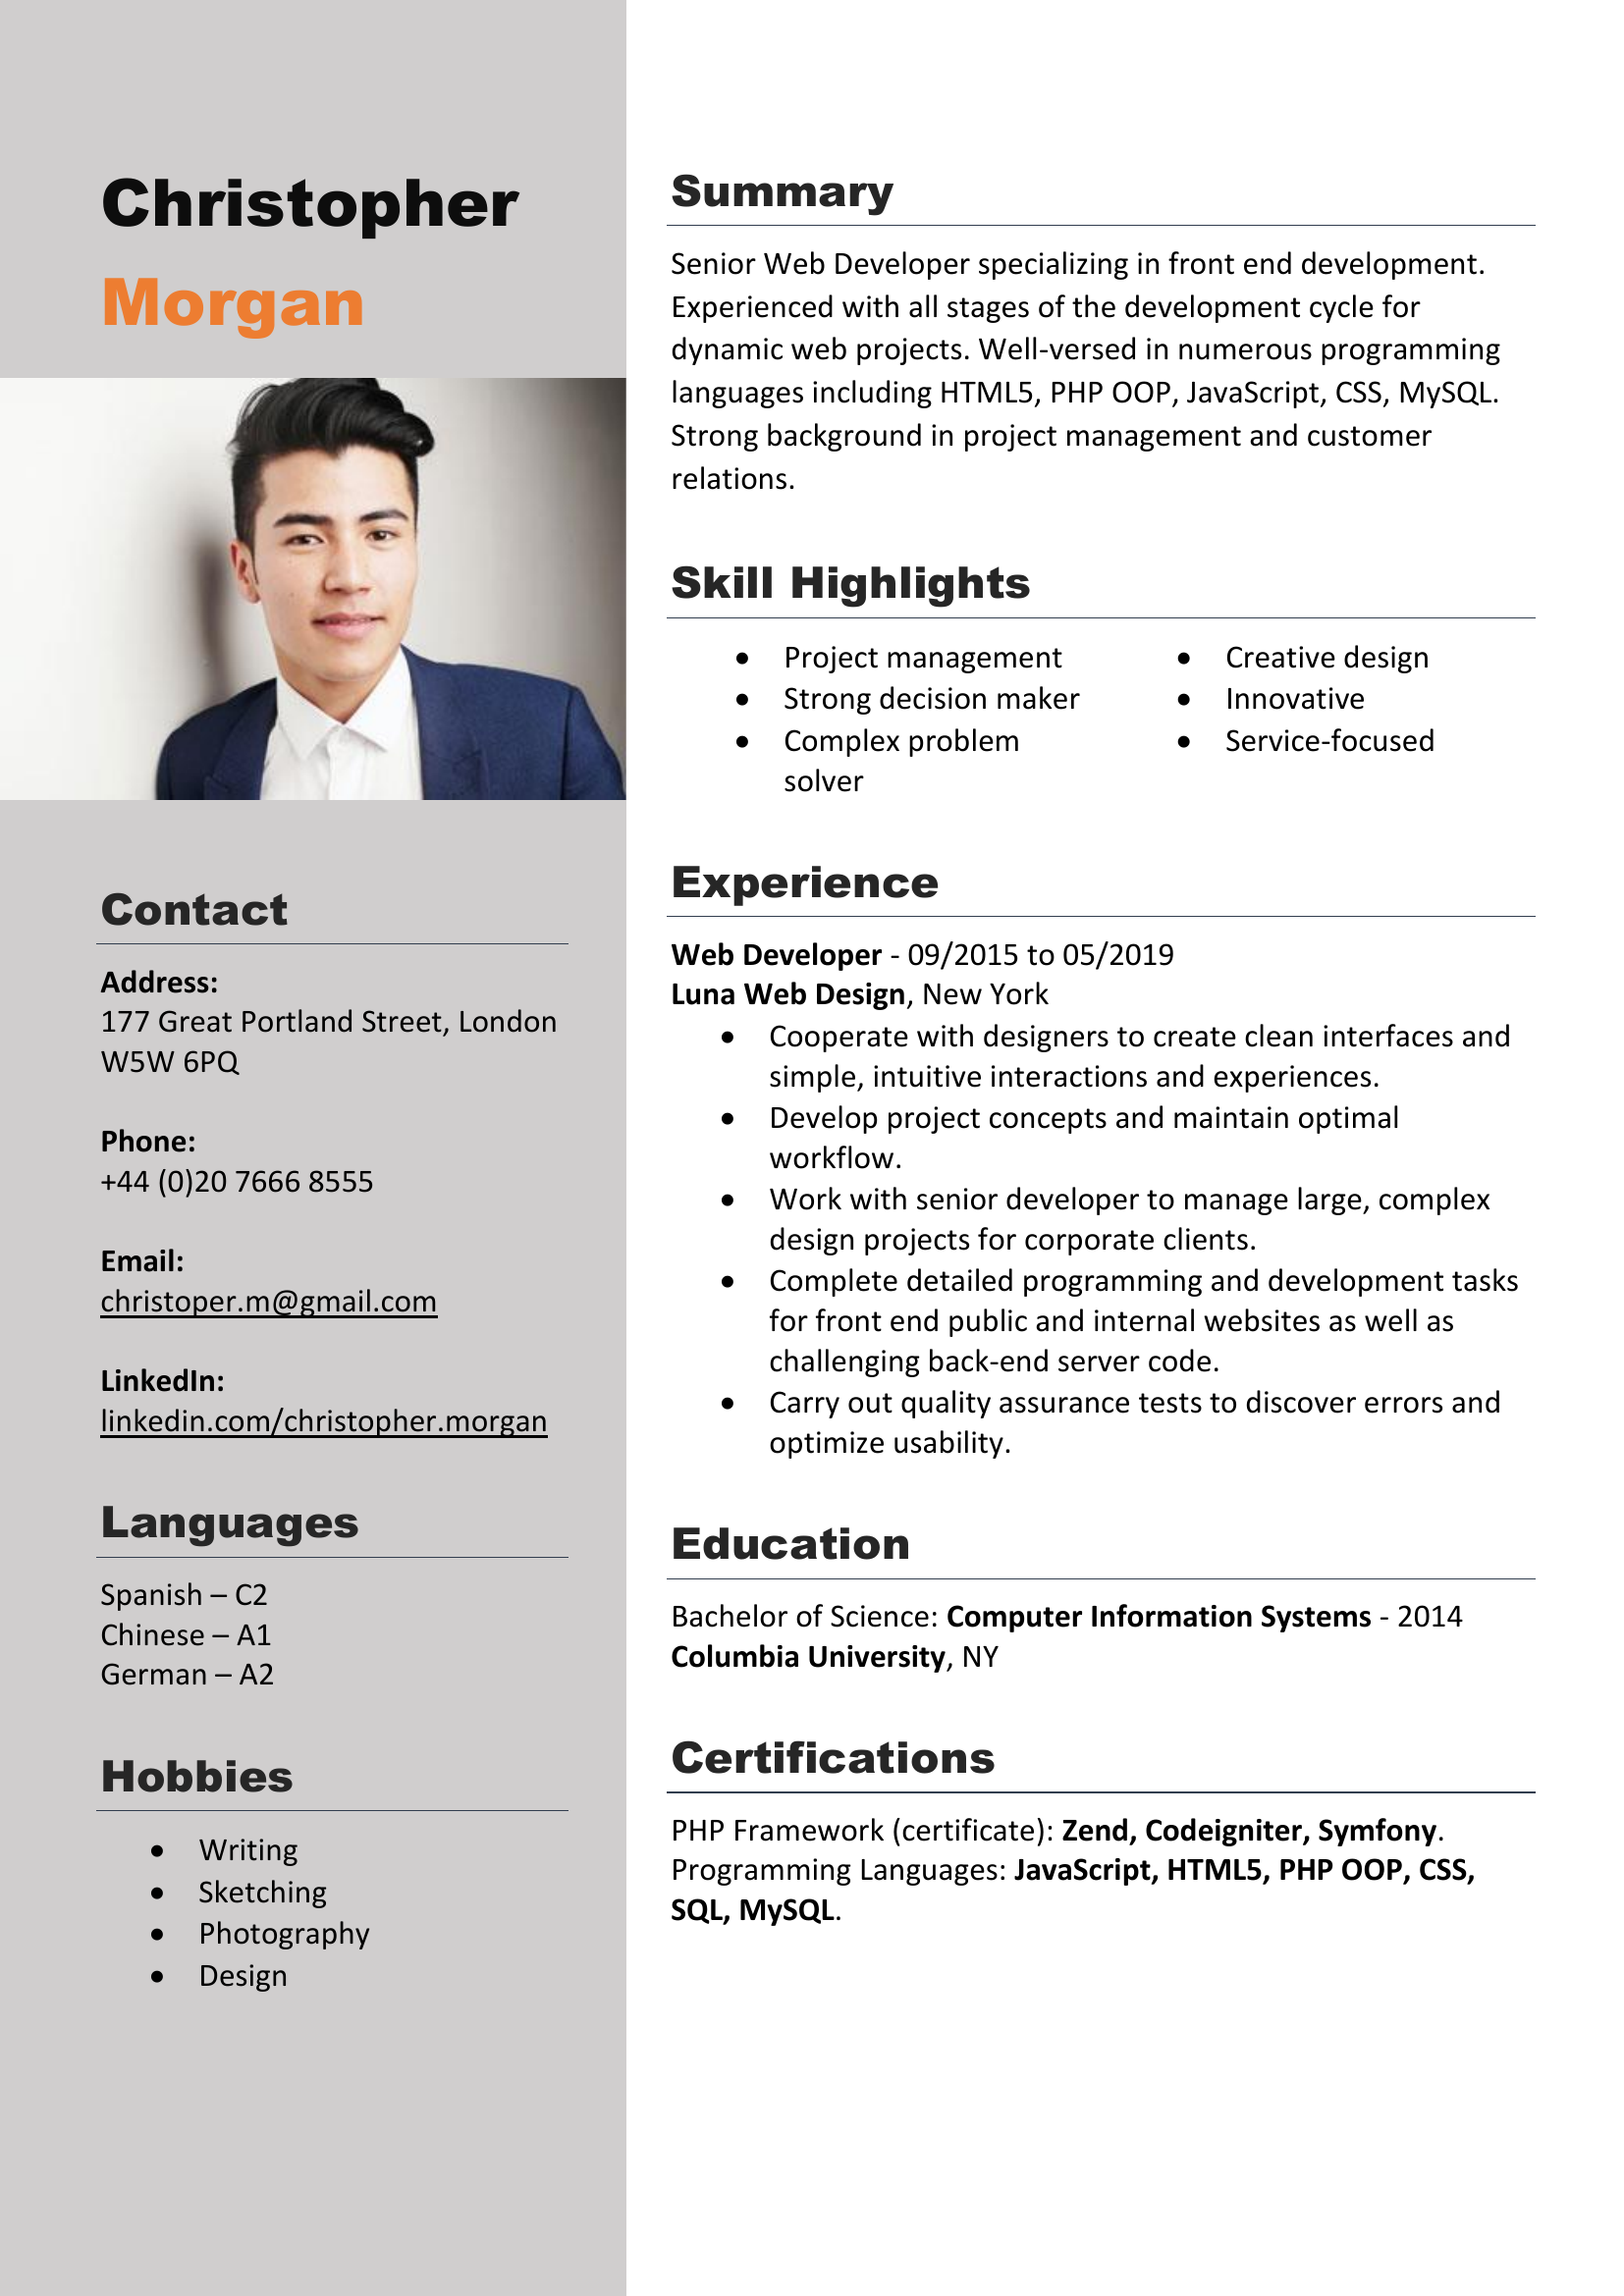

In [27]:
from IPython.display import display, Image
display(images[0])

In [28]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[96, 168], [537, 168], [537, 254], [96, 254]],
  'Christopher',
  0.9656267464126915),
 ([[675, 165], [918, 165], [918, 228], [675, 228]],
  'Summary',
  0.7602781945326983),
 ([[679, 250], [1517, 250], [1517, 292], [679, 292]],
  'Senior Web Developer specializing in front end development:',
  0.8640119683374978),
 ([[99, 271], [381, 271], [381, 357], [99, 357]],
  'Morgan',
  0.9999958633040404),
 ([[680, 294], [1453, 294], [1453, 336], [680, 336]],
  'Experienced with all stages of the development cycle for',
  0.989665534051444),
 ([[681, 335], [1535, 335], [1535, 379], [681, 379]],
  'dynamic web projects Wel-versed in numerous programming',
  0.7422594447942118),
 ([[677, 377], [1528, 377], [1528, 426], [677, 426]],
  'languages including HTMLS, PHP OOP, JavaScript, CSS, MySQL:',
  0.6334744685262895),
 ([[677, 425], [1465, 425], [1465, 468], [677, 468]],
  'Strong background in project management and customer',
  0.9237253484365238),
 ([[679, 471], [811, 471], [811, 507], [67

In [29]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

#### Drawing boxes

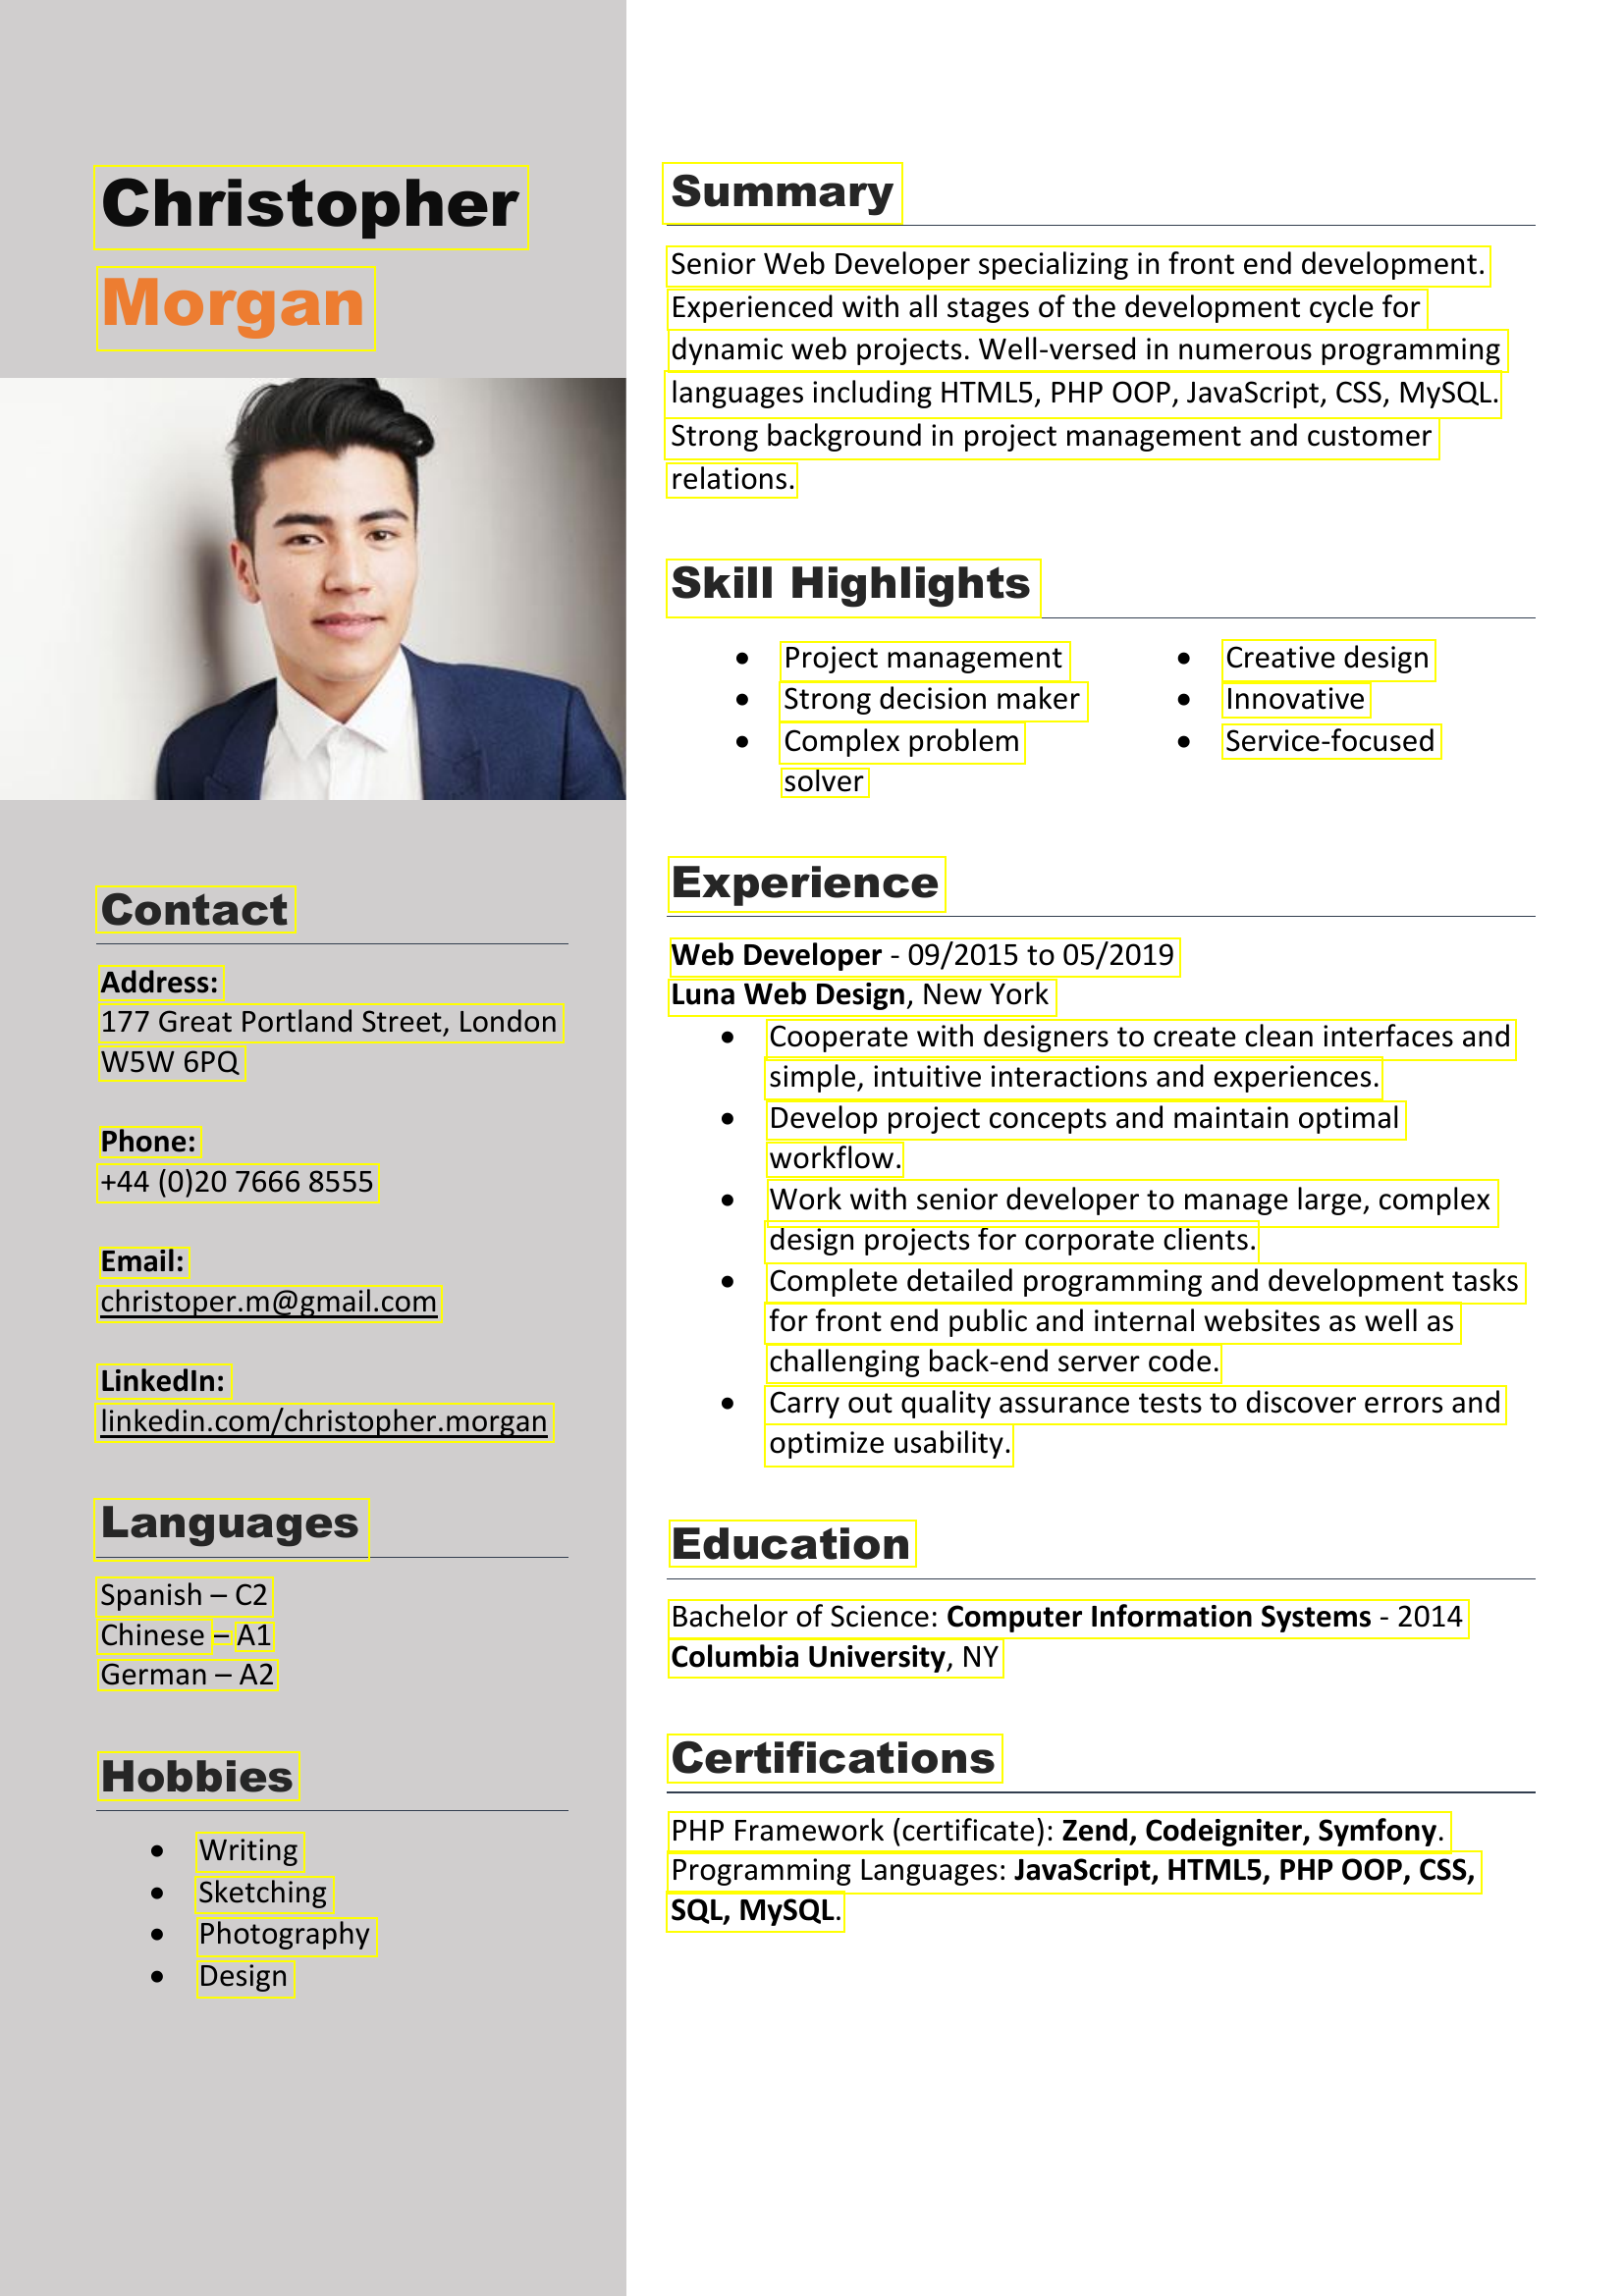

In [30]:
draw_boxes(images[0], bounds)

In [31]:
bounds[1][1]

'Summary'

In [32]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

#### Displaying all texts

In [33]:
print(text)

Christopher
Summary
Senior Web Developer specializing in front end development:
Morgan
Experienced with all stages of the development cycle for
dynamic web projects Wel-versed in numerous programming
languages including HTMLS, PHP OOP, JavaScript, CSS, MySQL:
Strong background in project management and customer
relations:
Skill Highlights
Project management
Creative design
Strong decision maker
Innovative
Complex problem
Service-focused
solver
Contact
Experience
Web Developer - 09/2015 to 05/2019
Address:
Luna Web Design, New York
177 Great Portland Street, London
Cooperate with designers to create clean interfaces and
WSW 6PQ
simple, intuitive interactions and experiences:
Develop project concepts and maintain optimal
Phone:
workflow.
+44 (0)20 7666 8555
Work with senior developer to manage large, complex
Email:
design projects for corporate clients.
christoper m@gmailcom
Complete detailed programming and development tasks
for front end public and internal websites as well as
Linkedln

In [34]:
nlp=spacy.load('en_core_web_sm')

In [35]:
doc = nlp(text)

#### Displaying info

In [36]:
from spacy import displacy
displacy.render(nlp(doc.text),style='ent', jupyter=True)

## Working on Resume Sample 4

#### Converting PDF to Images

In [37]:
images = convert_from_path('/content/drive/MyDrive/Resume Parser From PDF File/Sample Resumes/4.pdf')

#### Displaying the image

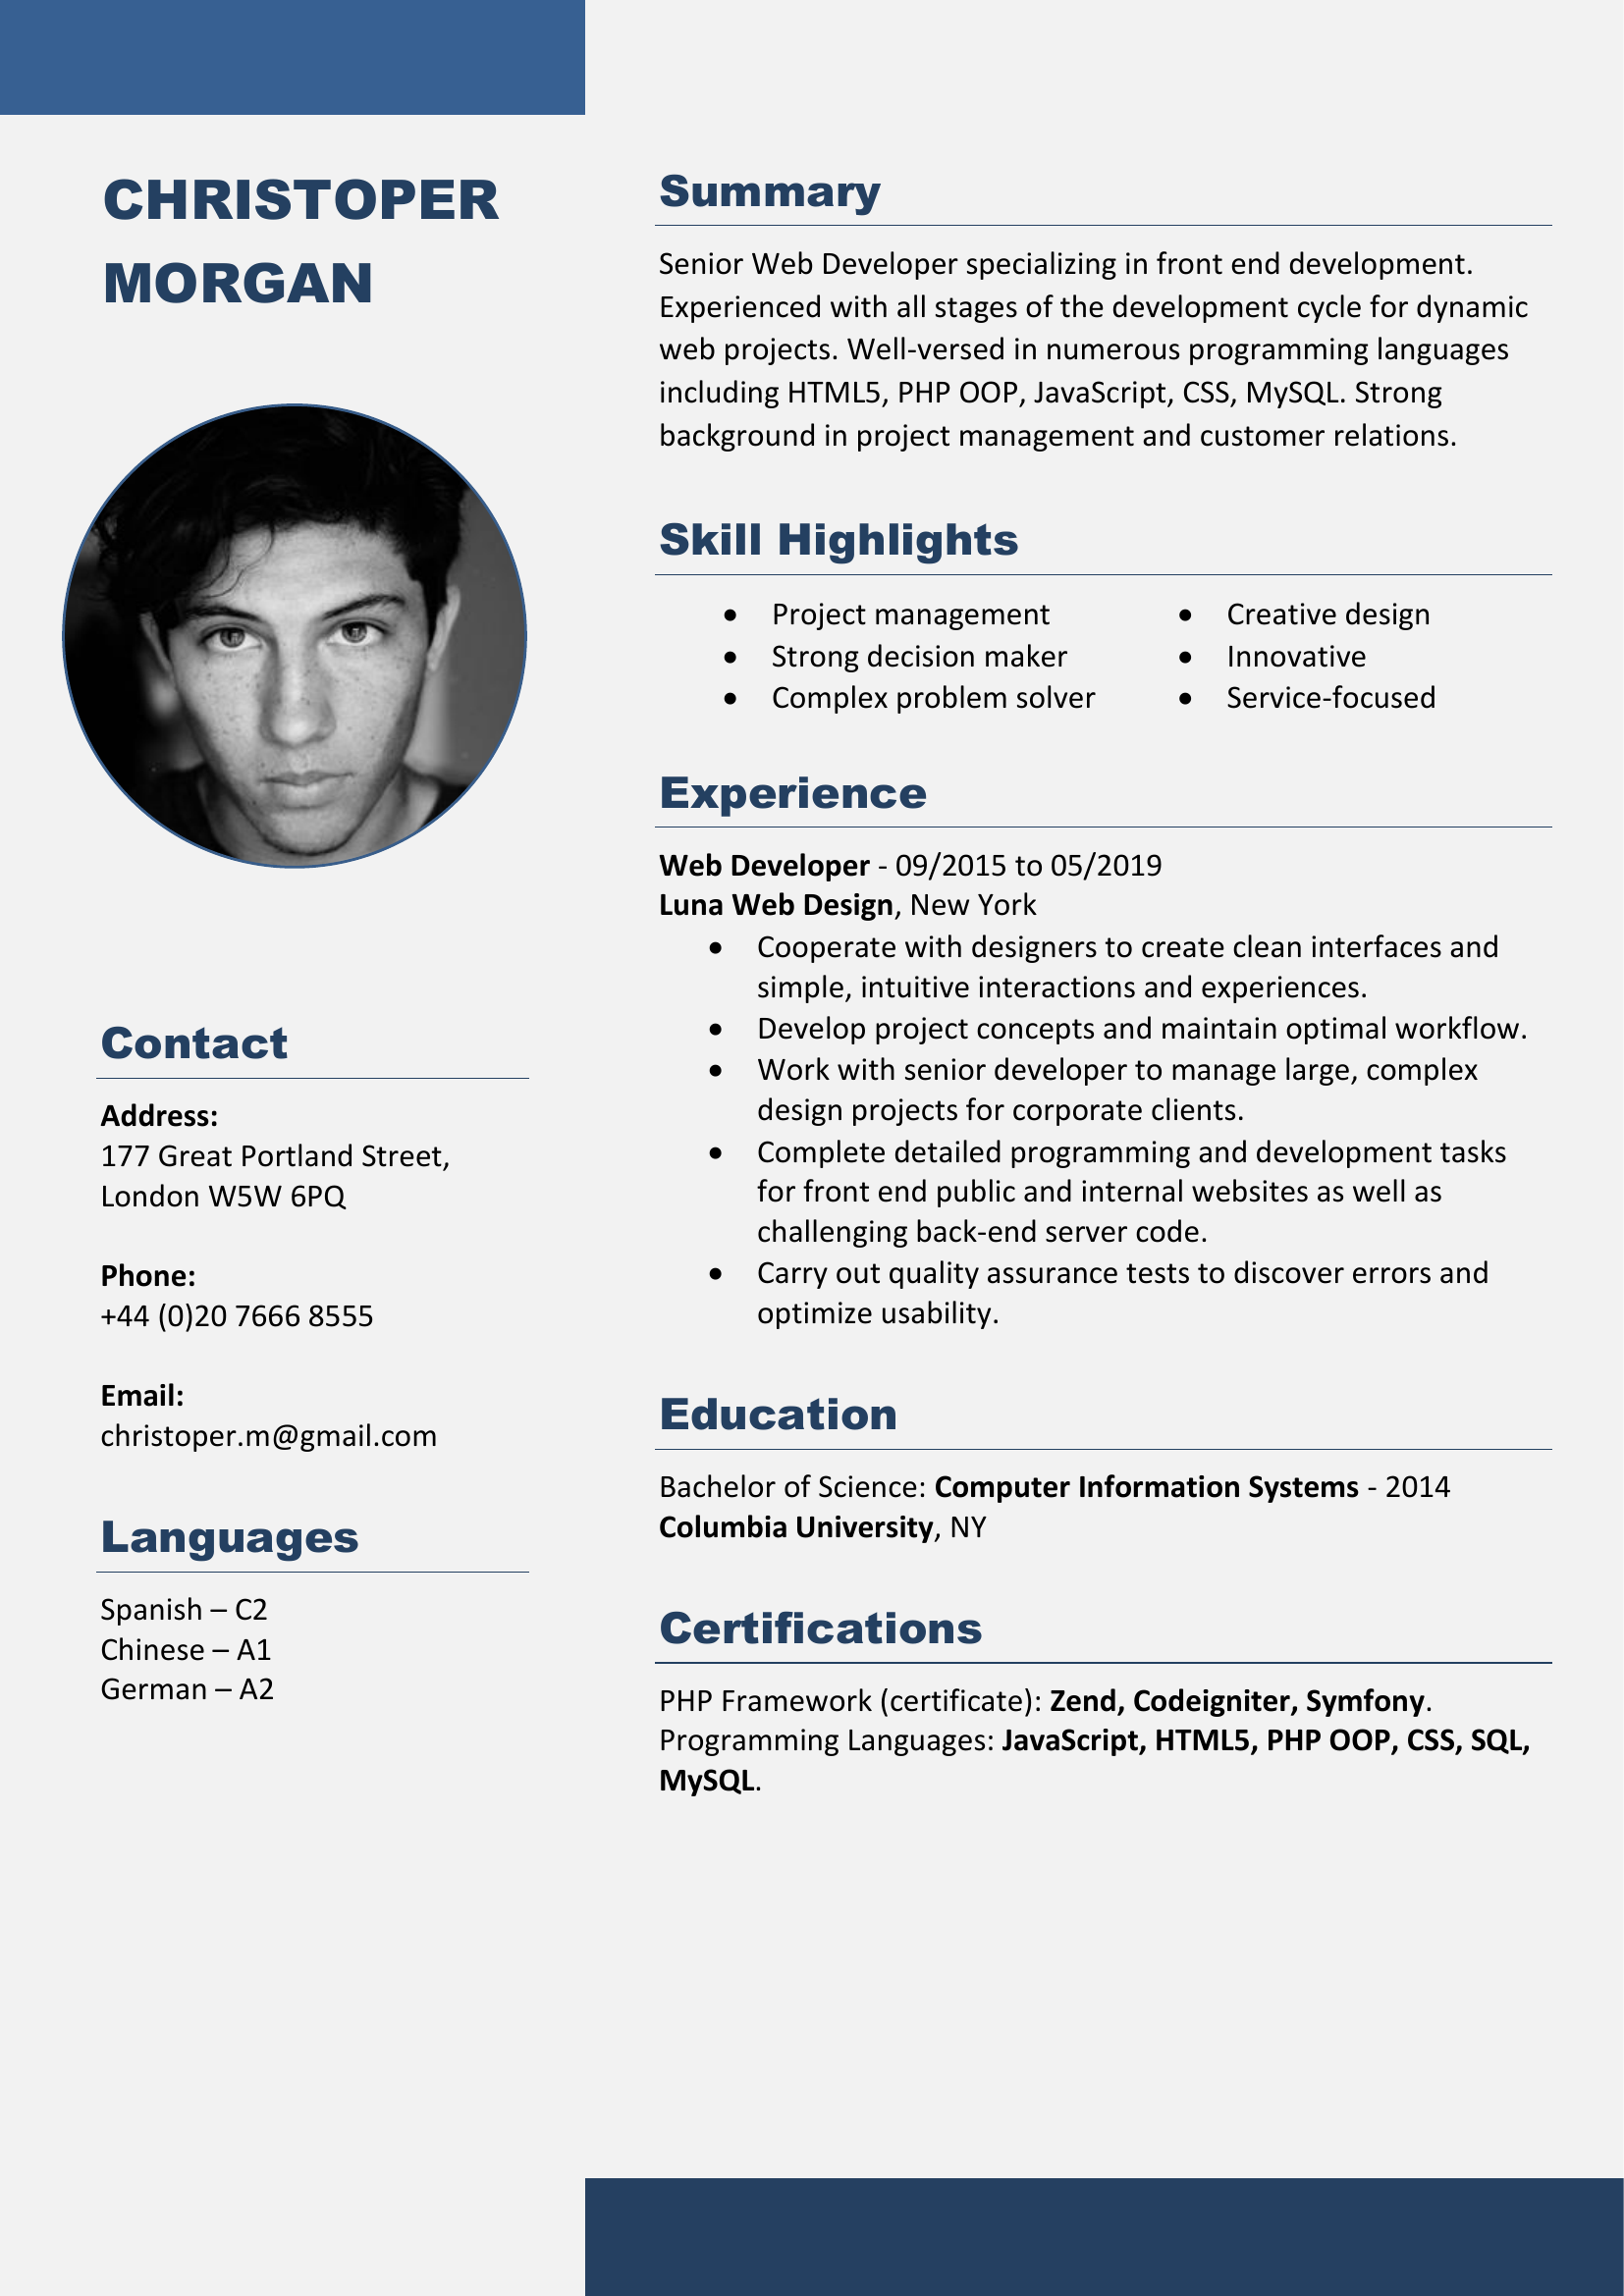

In [38]:
from IPython.display import display, Image
display(images[0])

In [39]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[102, 175], [515, 175], [515, 231], [102, 231]],
  'CHRISTOPER',
  0.941612077882256),
 ([[663, 165], [904, 165], [904, 227], [663, 227]],
  'Summary',
  0.8616470921774209),
 ([[106, 261], [385, 261], [385, 315], [106, 315]],
  'MORGAN',
  0.9993892992079568),
 ([[667, 250], [1503, 250], [1503, 292], [667, 292]],
  'Senior Web Developer specializing in front end development:',
  0.7961808731760474),
 ([[668, 293], [1563, 293], [1563, 336], [668, 336]],
  'Experienced with all stages of the development cycle for dynamic',
  0.7770768716628029),
 ([[669, 336], [1543, 336], [1543, 381], [669, 381]],
  'web projects Well-versed in numerous programming languages',
  0.8669058274017634),
 ([[664, 376], [1477, 376], [1477, 425], [664, 425]],
  'including HTMLS, PHP OOP, JavaScript, CSS, MySQL Strong',
  0.5920345523654877),
 ([[669, 423], [1485, 423], [1485, 467], [669, 467]],
  'background in project management and customer relations',
  0.9090822206995539),
 ([[665, 525], [1047, 525], [

In [40]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

#### Drawing boxes over information

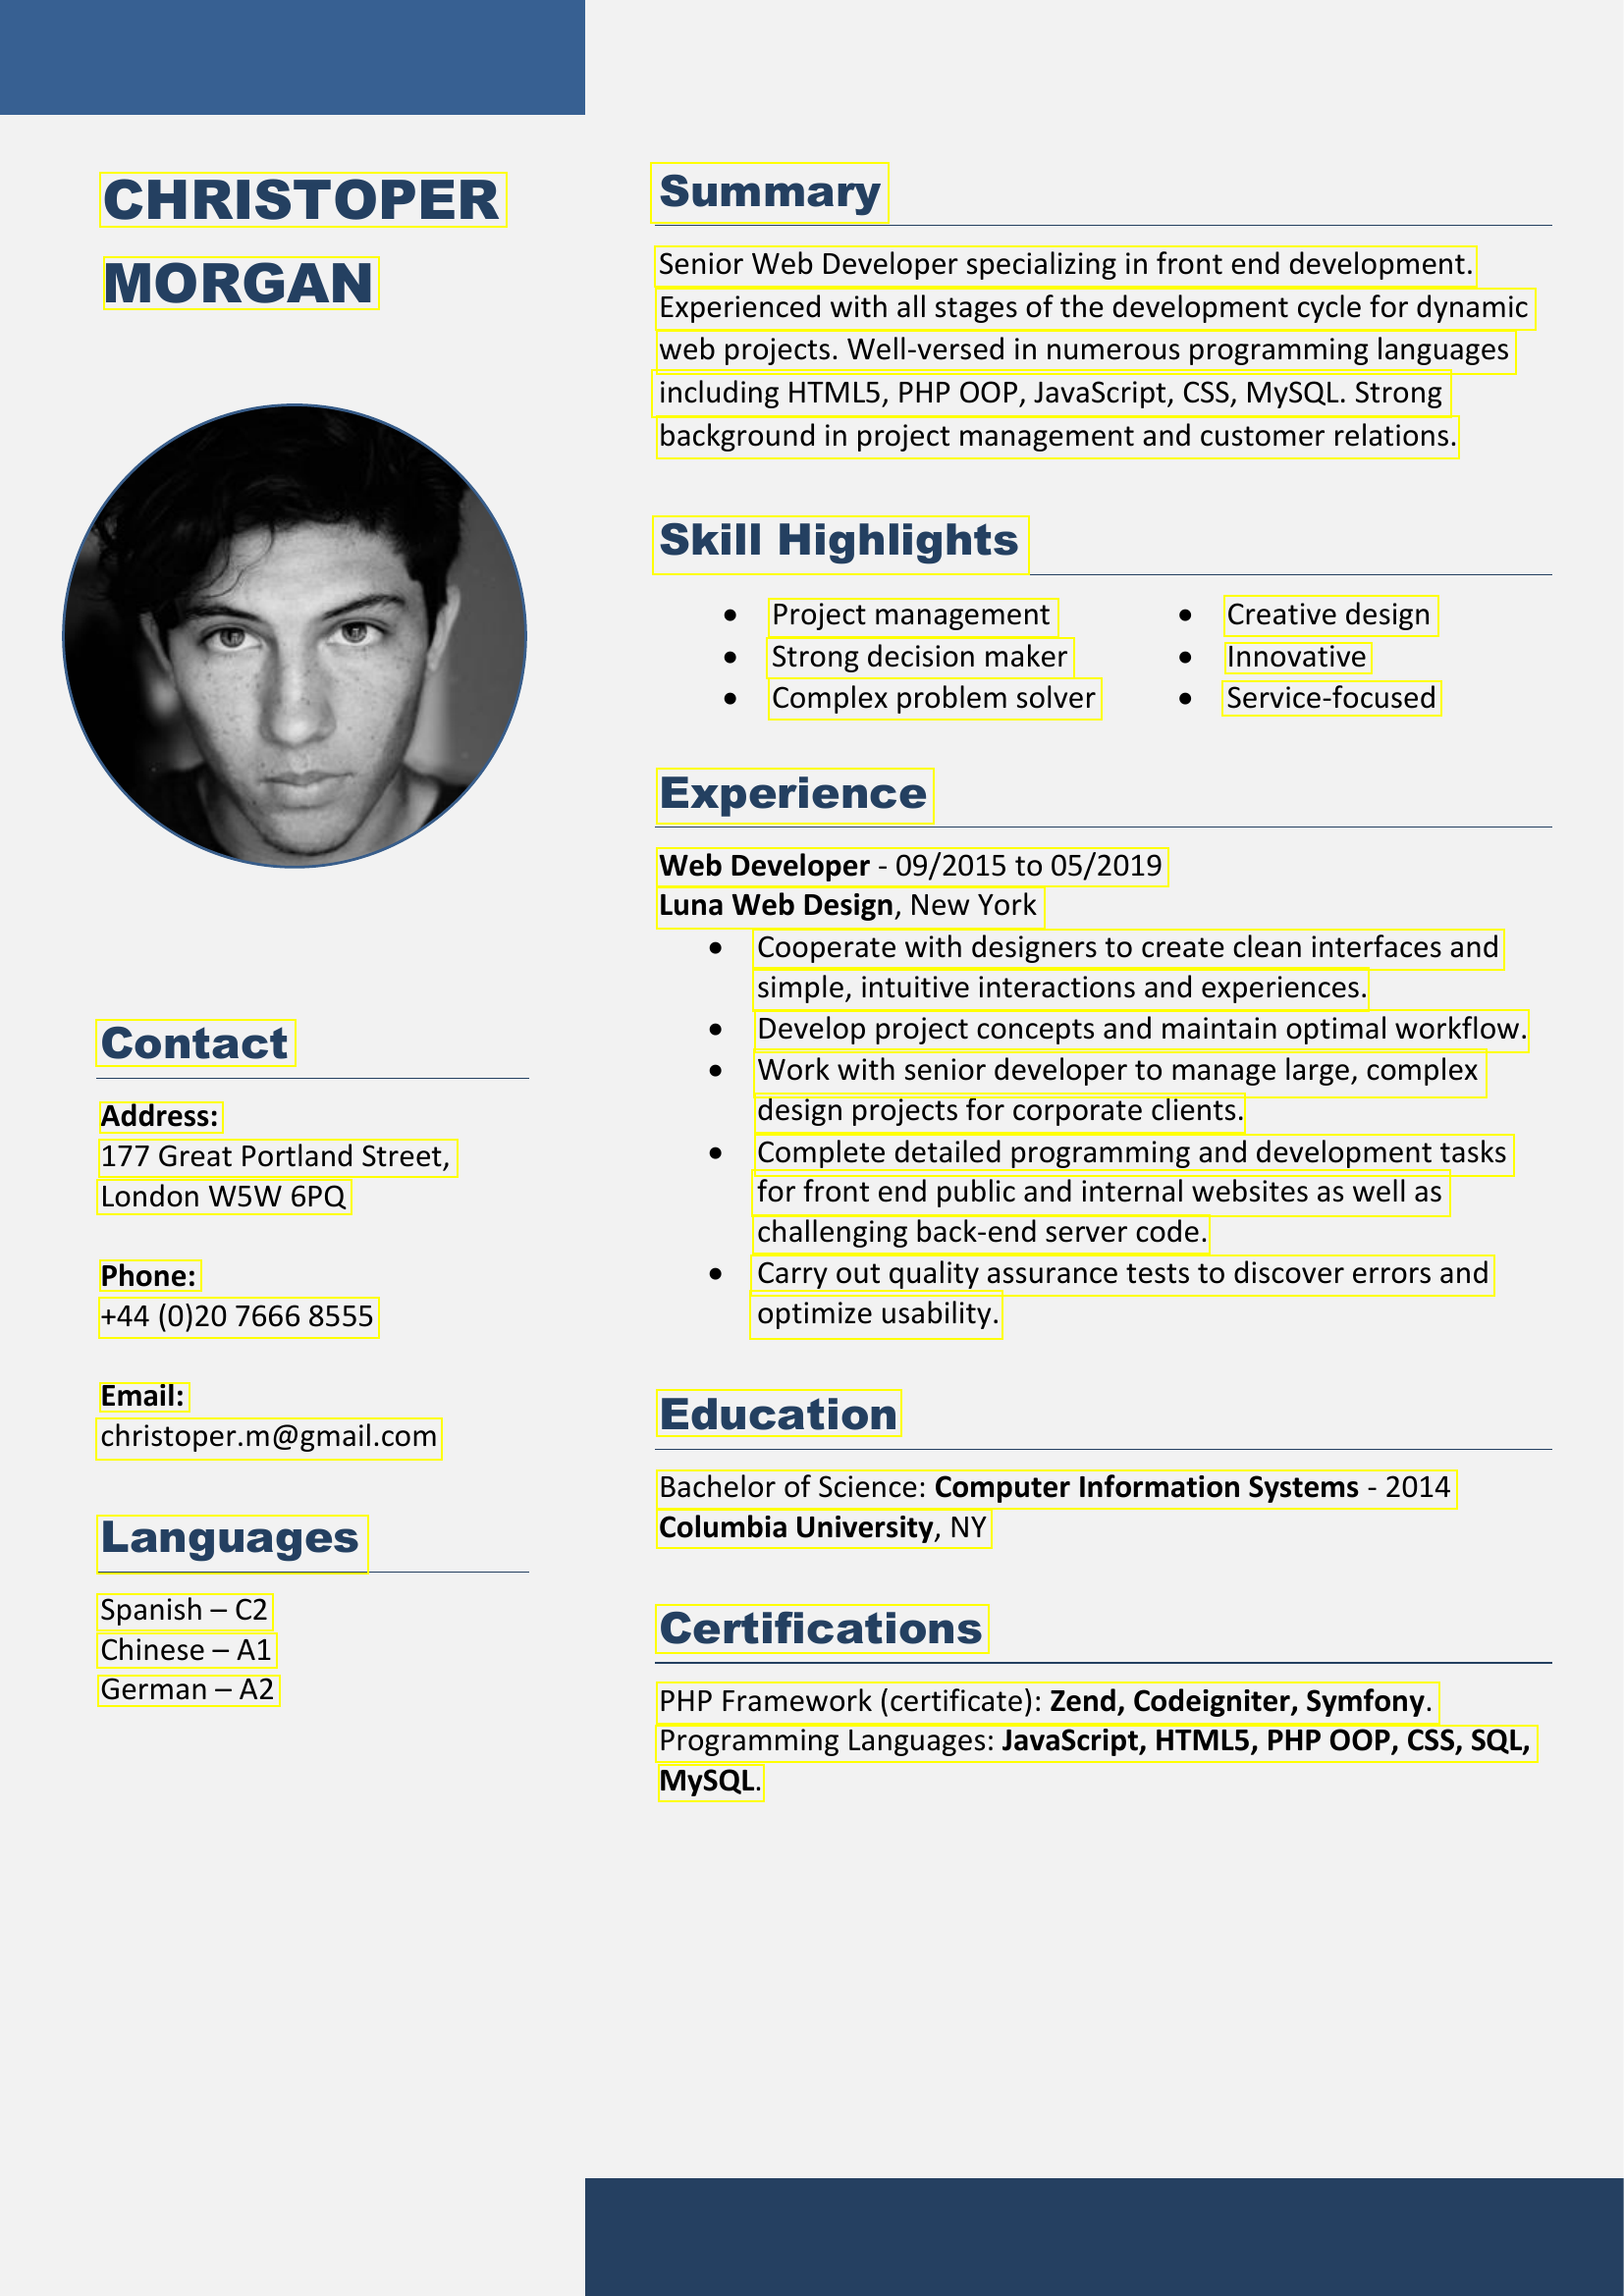

In [41]:
draw_boxes(images[0], bounds)

In [42]:
bounds[1][1]

'Summary'

In [43]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

#### Displaying all texts

In [44]:
print(text)

CHRISTOPER
Summary
MORGAN
Senior Web Developer specializing in front end development:
Experienced with all stages of the development cycle for dynamic
web projects Well-versed in numerous programming languages
including HTMLS, PHP OOP, JavaScript, CSS, MySQL Strong
background in project management and customer relations
Skill Highlights
Project management
Creative design
Strong decision maker
Innovative
Complex problem solver
Service-focused
Experience
Web Developer - 09/2015 to 05/2019
Luna Web Design, New York
Cooperate with designers to create clean interfaces and
simple, intuitive interactions and experiences.
Contact
Develop project concepts and maintain optimal workflow.
Work with senior developer to manage large, complex
Address:
design projects for corporate clients.
177 Great Portland Street,
Complete detailed programming and development tasks
London WSW 6PQ
for front end public and internal websites as well as
challenging back-end server code:
Phone:
Carry out quality assuran

In [45]:
nlp=spacy.load('en_core_web_sm')

In [46]:
doc = nlp(text)

#### Displaying info

In [47]:
from spacy import displacy
displacy.render(nlp(doc.text),style='ent', jupyter=True)

## Working on Resume Sample 5

#### Converting PDF to Images

In [59]:
images = convert_from_path('/content/drive/MyDrive/Resume Parser From PDF File/Sample Resumes/5.pdf')

#### Displaying the image

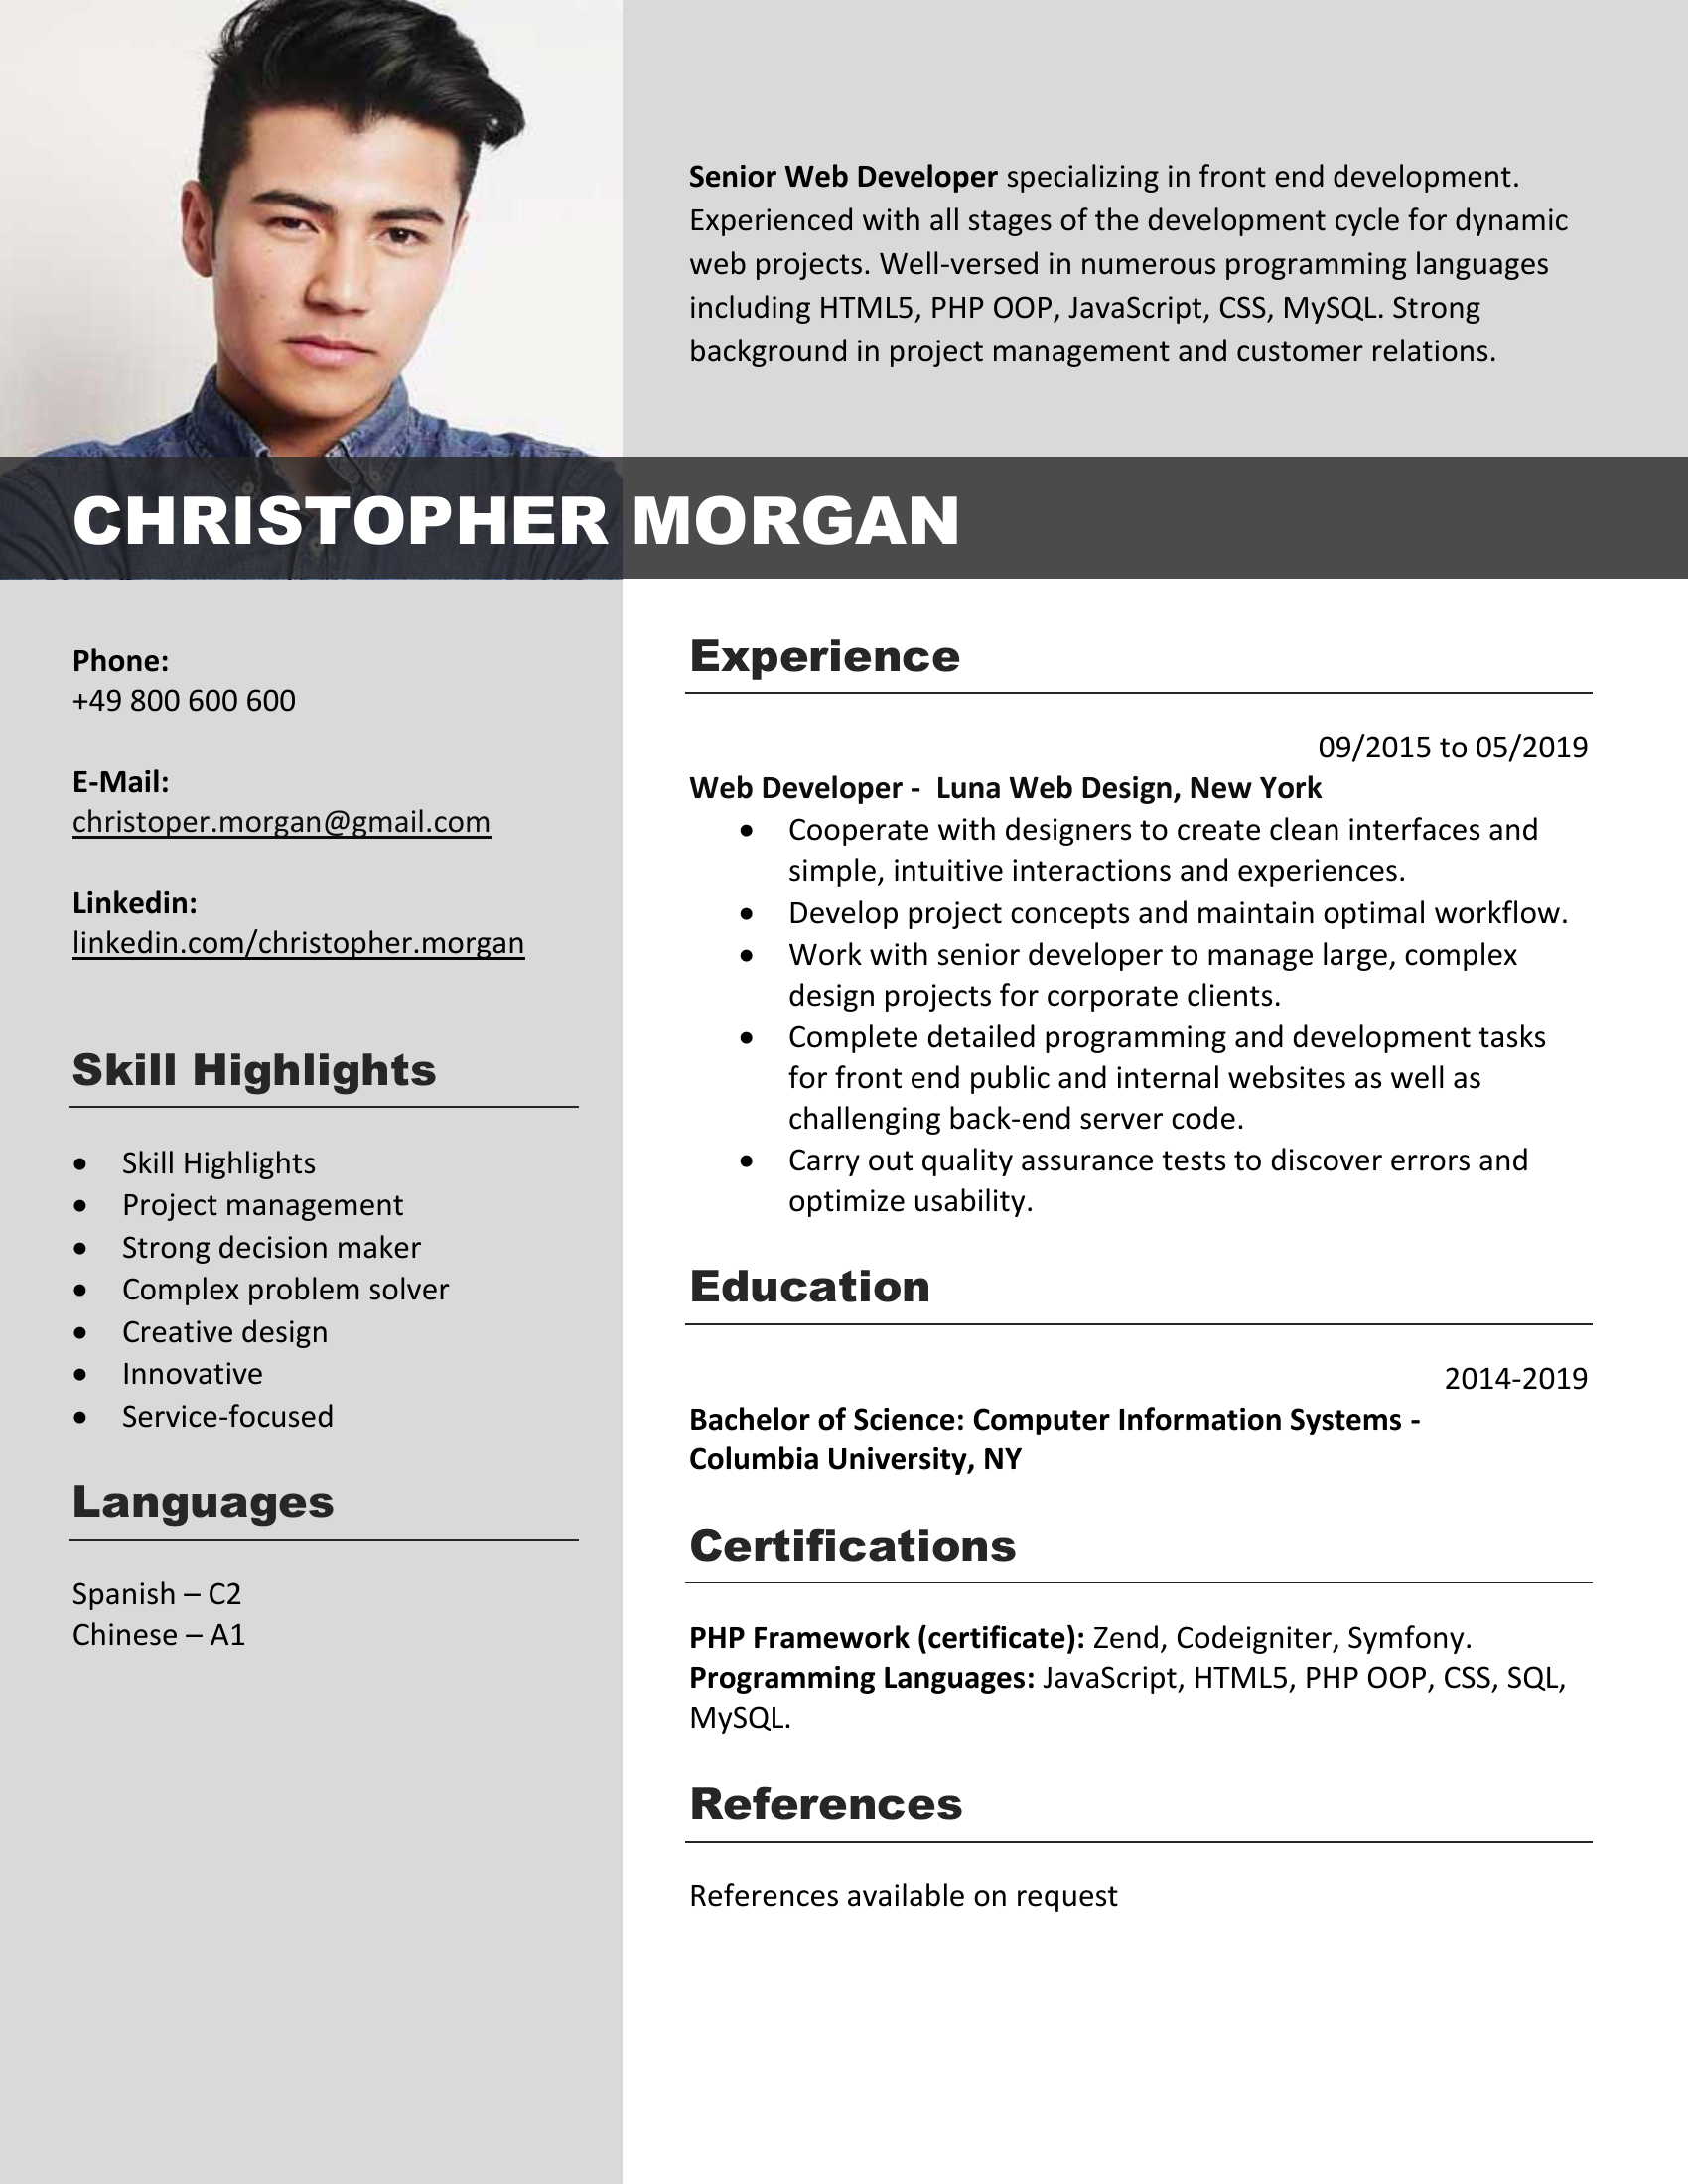

In [60]:
from IPython.display import display, Image
display(images[0])

In [61]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[690, 154], [1532, 154], [1532, 204], [690, 204]],
  'Senior Web Developer specializing in front end development:',
  0.5511883062734287),
 ([[690, 202], [1584, 202], [1584, 247], [690, 247]],
  'Experienced with all stages of the development cycle for dynamic',
  0.9354341700799573),
 ([[693, 246], [1565, 246], [1565, 291], [693, 291]],
  'web projects. Well-versed in numerous programming languages',
  0.8003181394707054),
 ([[686, 286], [1499, 286], [1499, 335], [686, 335]],
  'including HTMLS, PHP OOP, JavaScript, CSS, MySQL. Strong',
  0.68910605181898),
 ([[691, 335], [1507, 335], [1507, 378], [691, 378]],
  'background in project management and customer relations',
  0.9740942945979297),
 ([[68, 488], [974, 488], [974, 560], [68, 560]],
  'CHRISTOPHER MORGAN',
  0.9987916338365823),
 ([[72, 650], [176, 650], [176, 682], [72, 682]],
  'Phone:',
  0.9994847814247205),
 ([[694, 638], [972, 638], [972, 692], [694, 692]],
  'Experience',
  0.9851404786404391),
 ([[72, 690], [302, 6

In [62]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

#### Drawing boxes over information

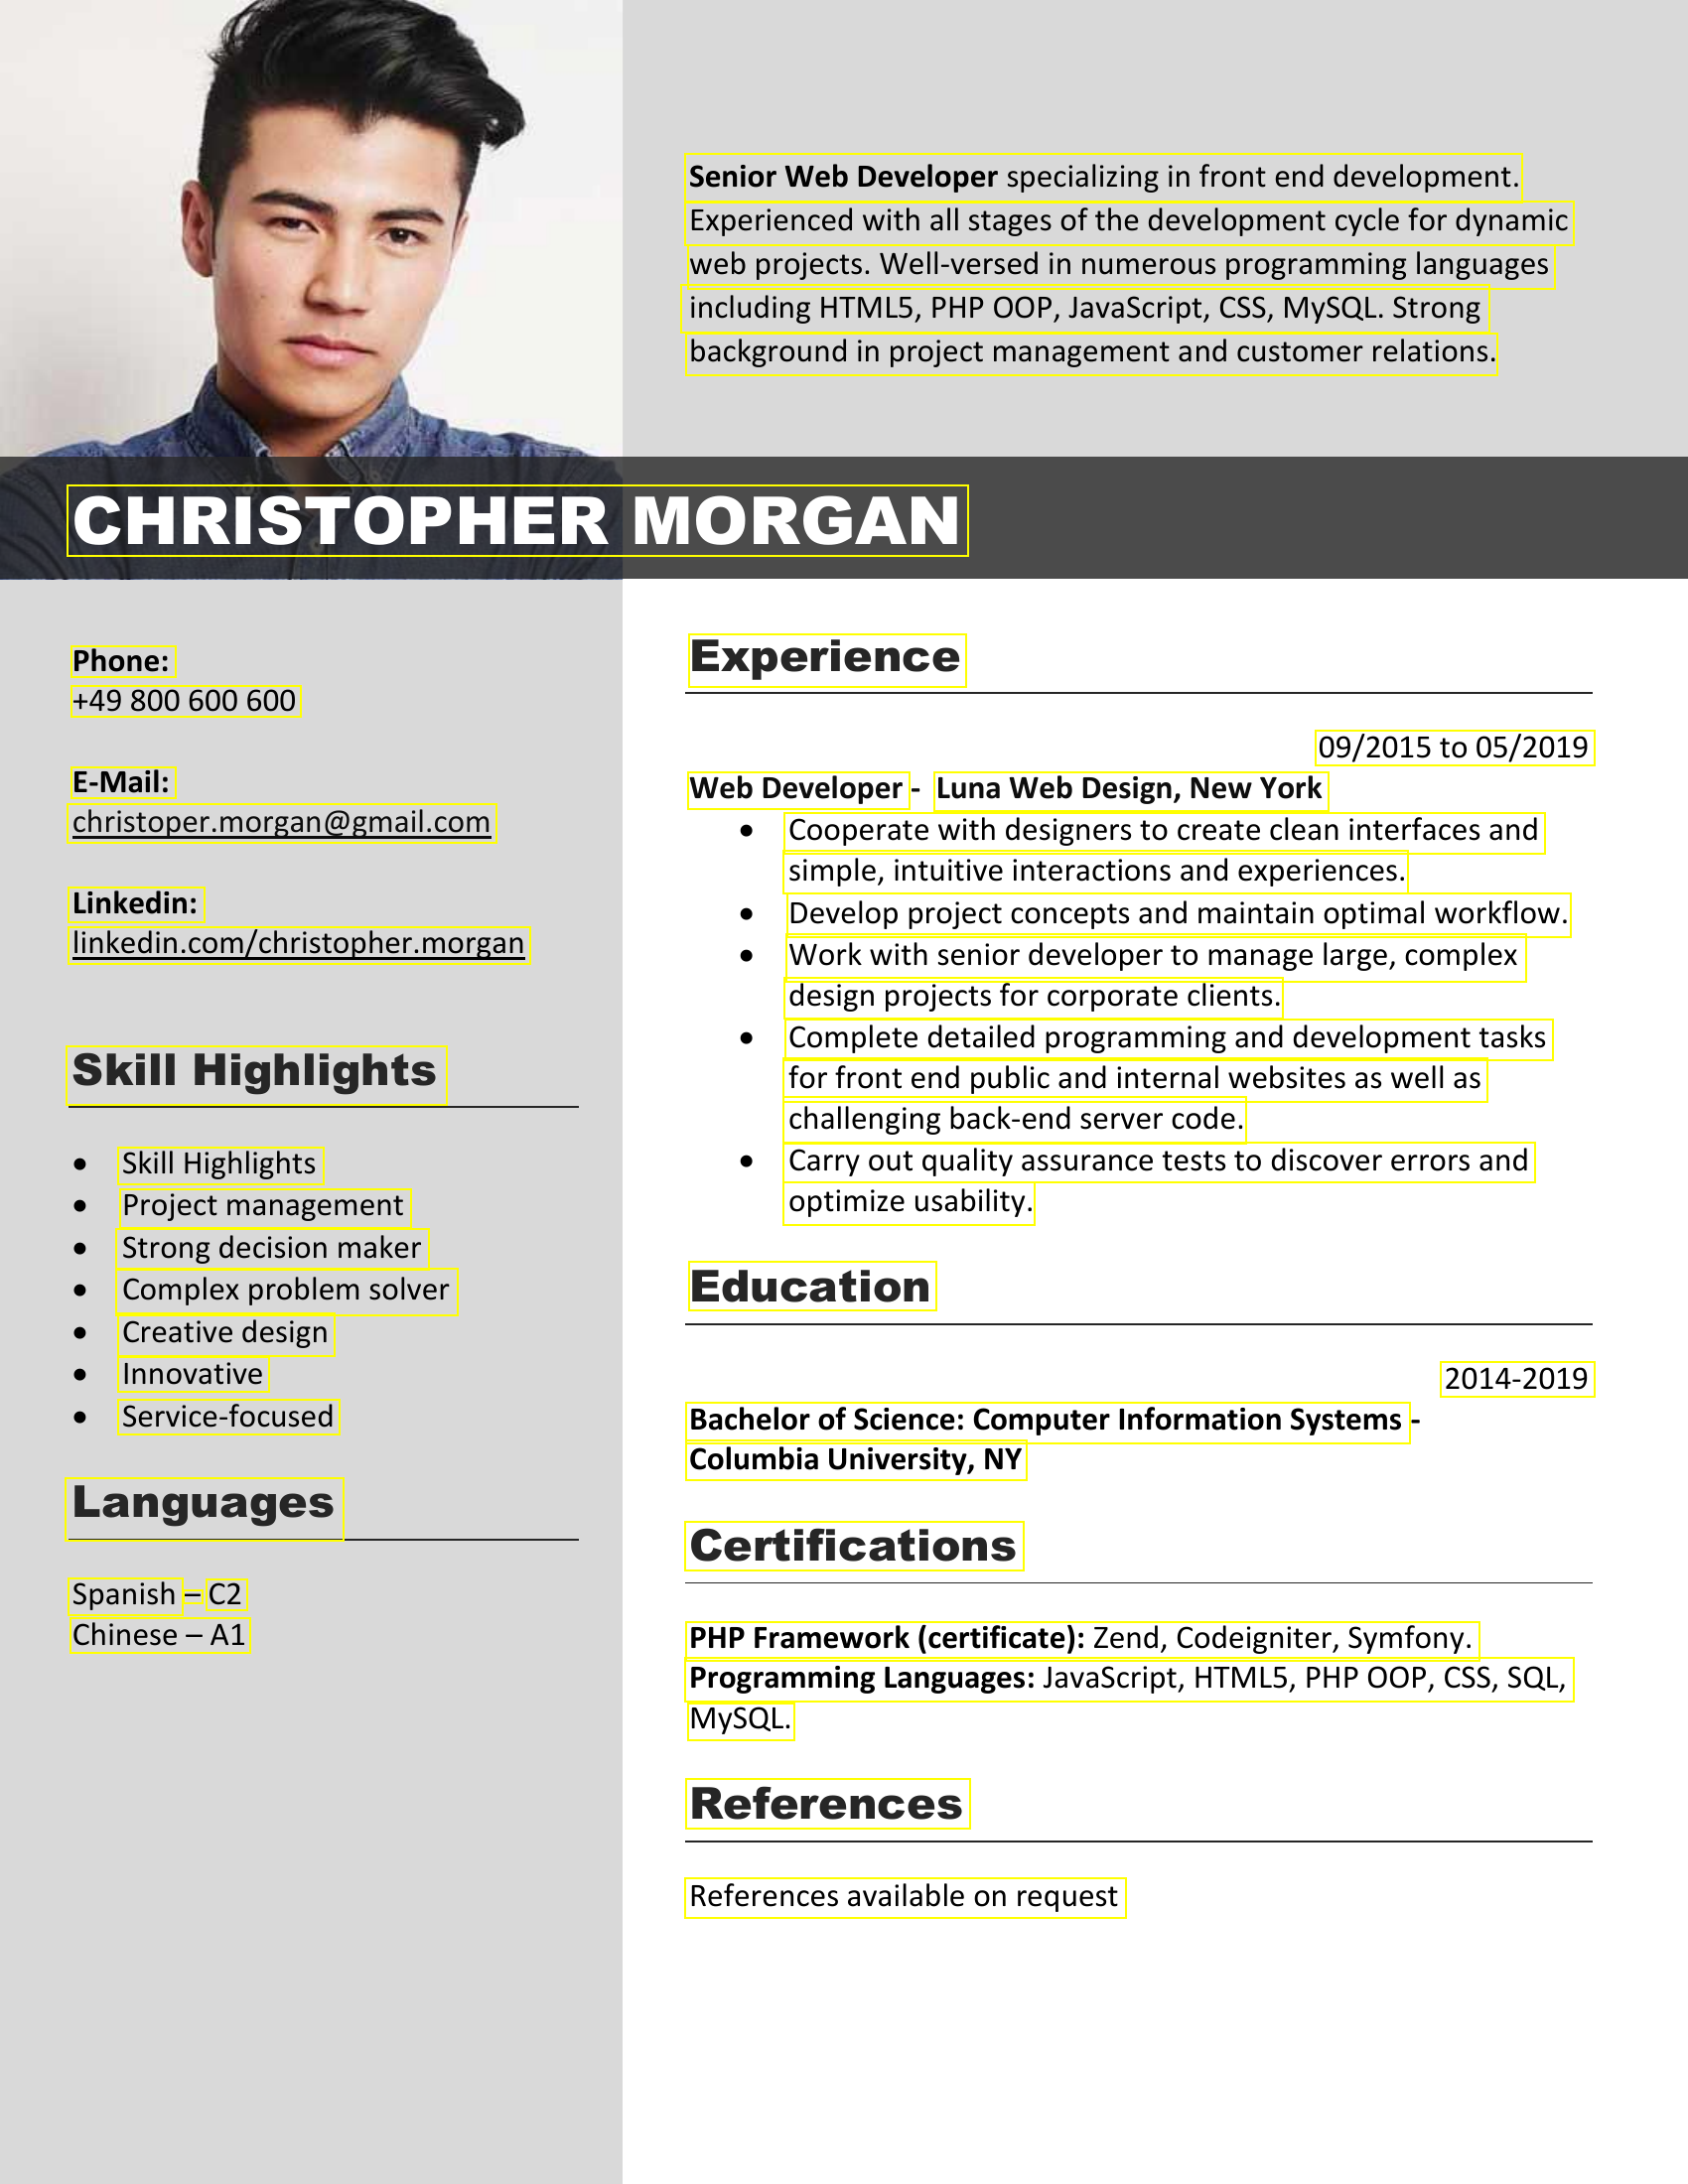

In [63]:
draw_boxes(images[0], bounds)

In [64]:
bounds[1][1]

'Experienced with all stages of the development cycle for dynamic'

In [65]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

#### Displaying all the texts

In [66]:
print(text)

Senior Web Developer specializing in front end development:
Experienced with all stages of the development cycle for dynamic
web projects. Well-versed in numerous programming languages
including HTMLS, PHP OOP, JavaScript, CSS, MySQL. Strong
background in project management and customer relations
CHRISTOPHER MORGAN
Phone:
Experience
+49 800 600 600
09/2015 to 05/2019
E-Mail:
Web Developer
Luna Web Design, New York
christoper morgan@gmailcom
Cooperate with designers to create clean interfaces and
simple, intuitive interactions and experiences:
Linkedin:
Develop project concepts and maintain optimal workflow.
linkedin com/christopher morgan
Work with senior developer to manage large, complex
design projects for corporate clients.
Complete detailed programming and development tasks
Skill Highlights
for front end public and internal websites as well as
chalenging back-end server code:
Skill Highlights
Carry out quality assurance tests to discover errors and
Project management
optimize usab

In [67]:
nlp=spacy.load('en_core_web_sm')

In [68]:
doc = nlp(text)

#### Displaying info

In [69]:
from spacy import displacy
displacy.render(nlp(doc.text),style='ent', jupyter=True)

## Working on Resume Sample 6

#### Converting PDF to Images

In [70]:
images = convert_from_path('/content/drive/MyDrive/Resume Parser From PDF File/Sample Resumes/6.pdf')

#### Displaying the image

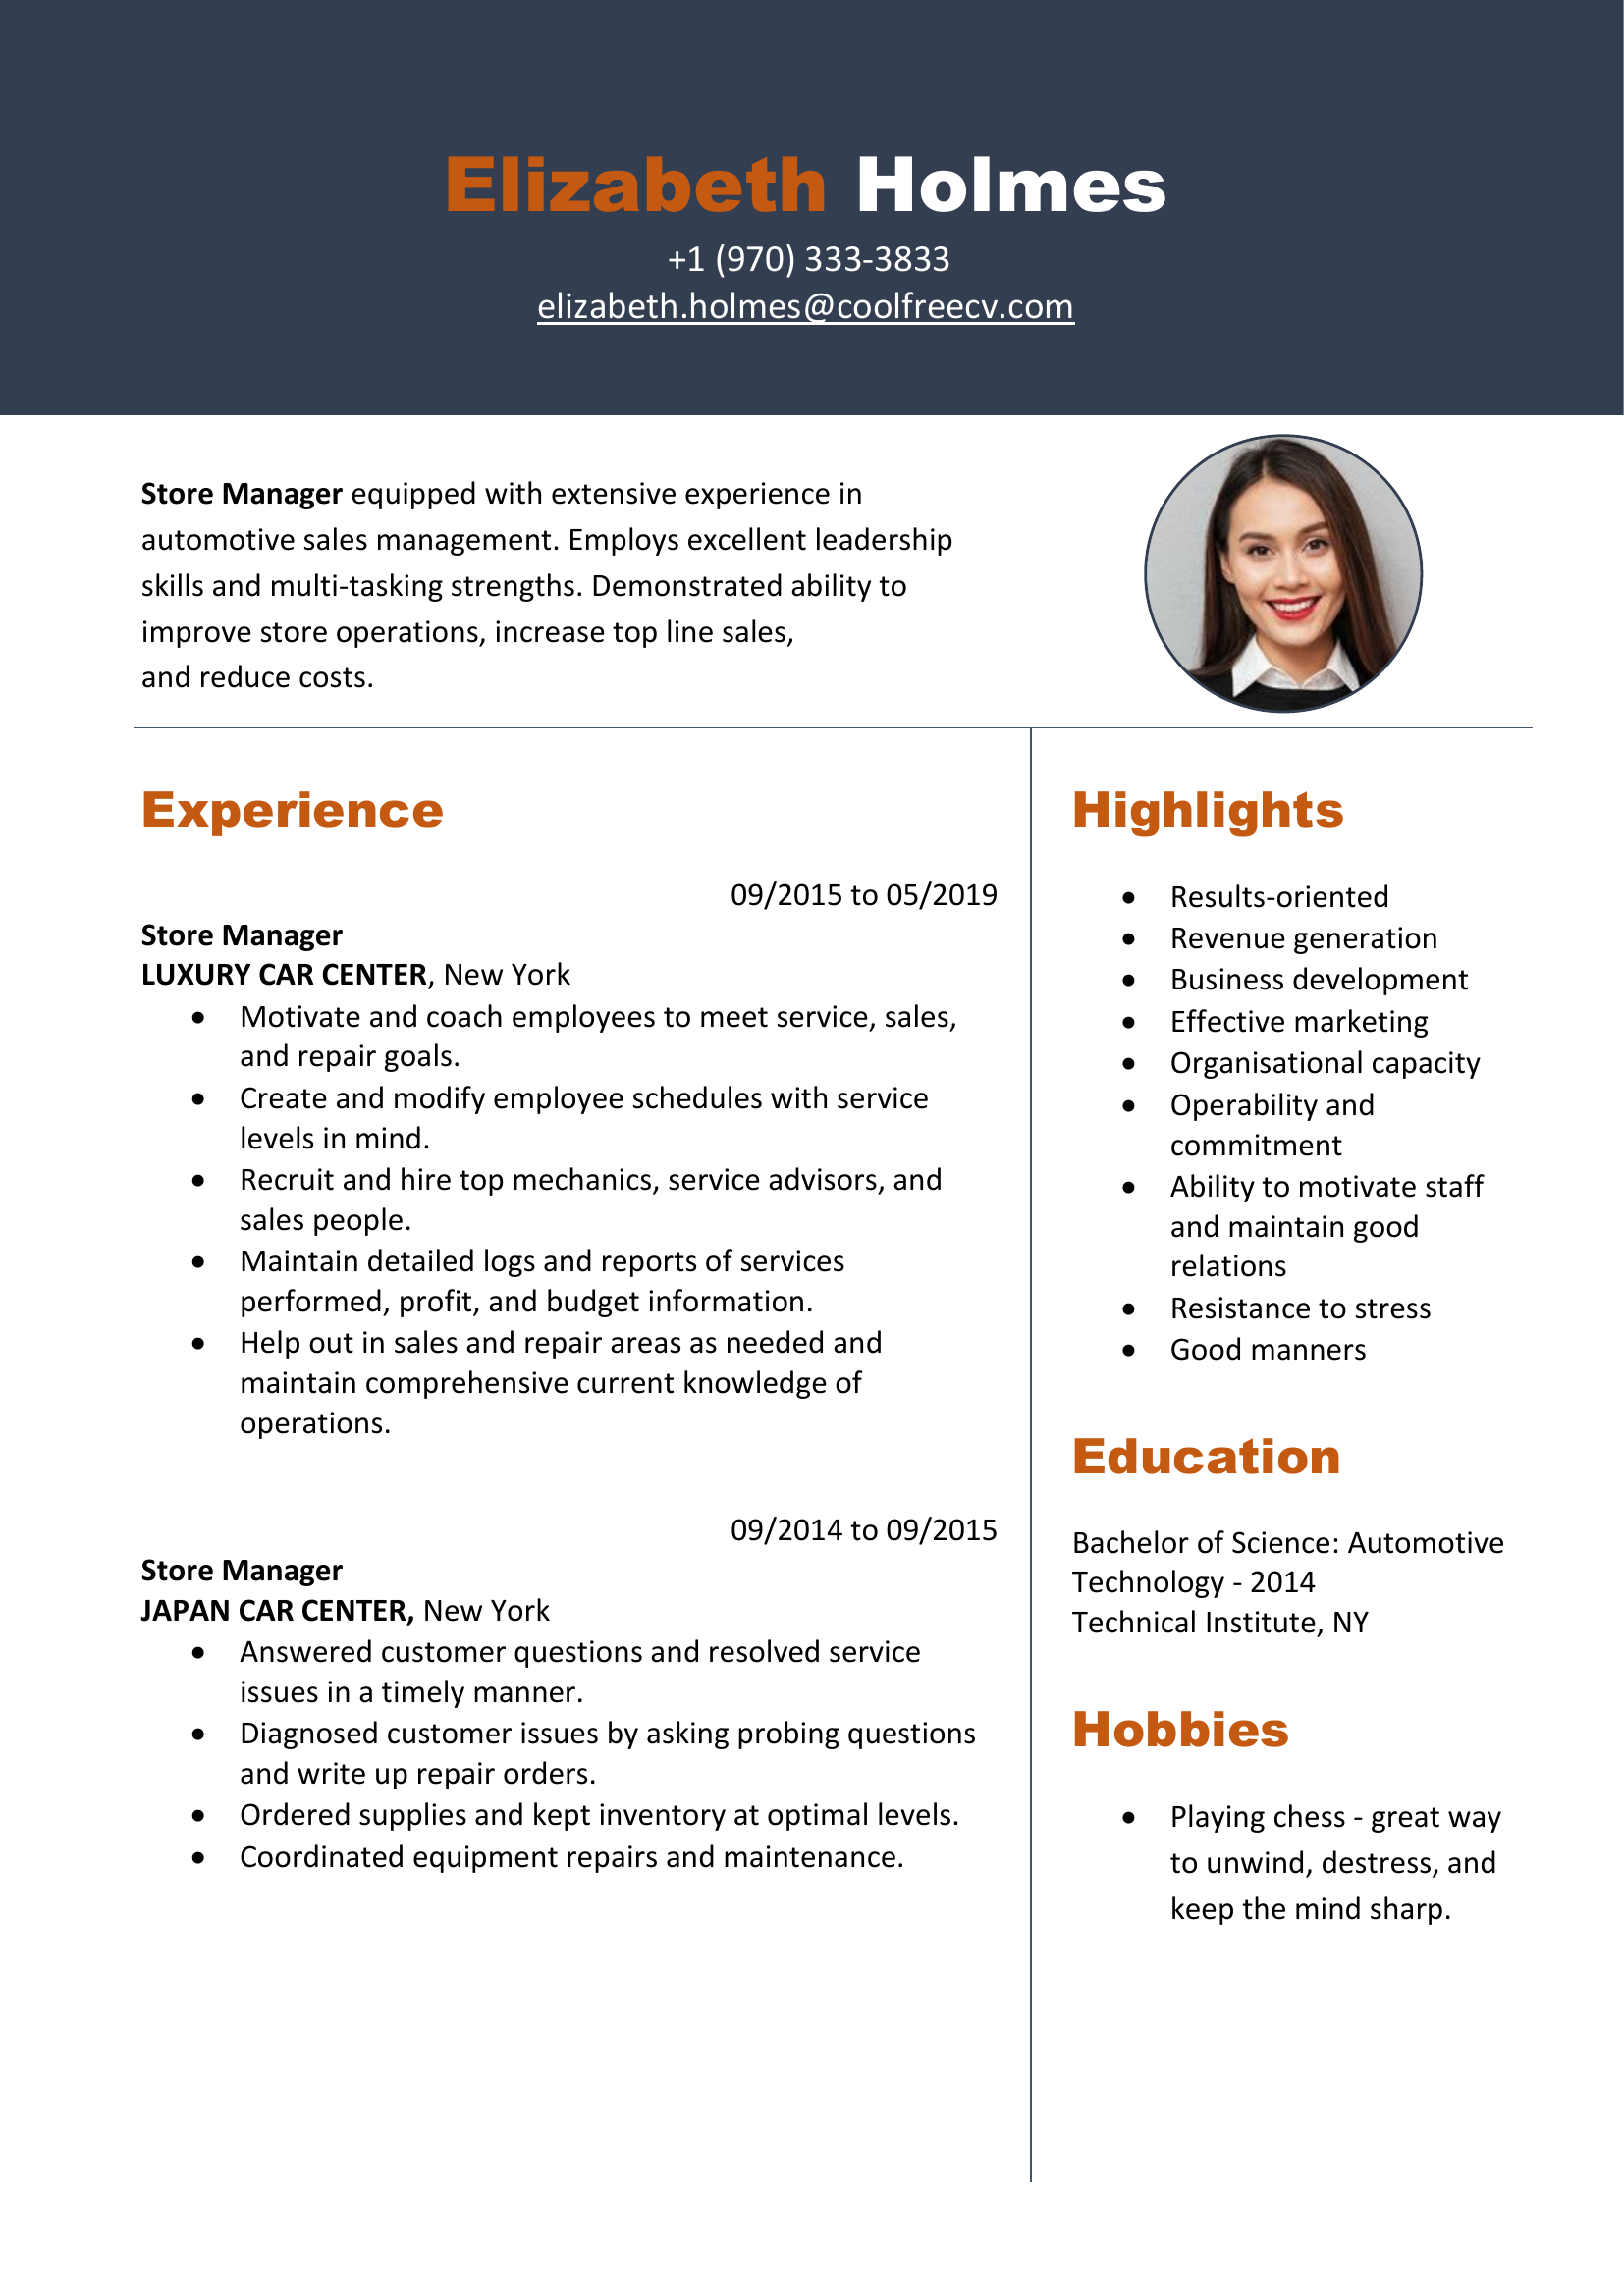

In [72]:
from IPython.display import display, Image
display(images[0])

In [73]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[450, 148], [1194, 148], [1194, 228], [450, 228]],
  'Elizabeth Holmes',
  0.9779545374721943),
 ([[677, 243], [973, 243], [973, 287], [677, 287]],
  '+1 (970) 333-3833',
  0.7161619052103203),
 ([[541, 291], [1097, 291], [1097, 334], [541, 334]],
  'elizabethholmes@coolfreecv com',
  0.8179591503984948),
 ([[138, 481], [884, 481], [884, 529], [138, 529]],
  'Store Manager equipped with extensive experience in',
  0.6299823949379197),
 ([[141, 533], [977, 533], [977, 574], [141, 574]],
  'automotive sales management: Employs excellent leadership',
  0.6309089070723612),
 ([[139, 576], [929, 576], [929, 619], [139, 619]],
  'skills and multi-tasking strengths Demonstrated ability to',
  0.8011738609719469),
 ([[138, 624], [816, 624], [816, 668], [138, 668]],
  'improve store operations, increase top line sales,',
  0.6990665190191956),
 ([[141, 673], [381, 673], [381, 709], [141, 709]],
  'and reduce costs.',
  0.8994348982939617),
 ([[140, 795], [461, 795], [461, 862], [140, 862]],


#### Drawing boxes over infromation

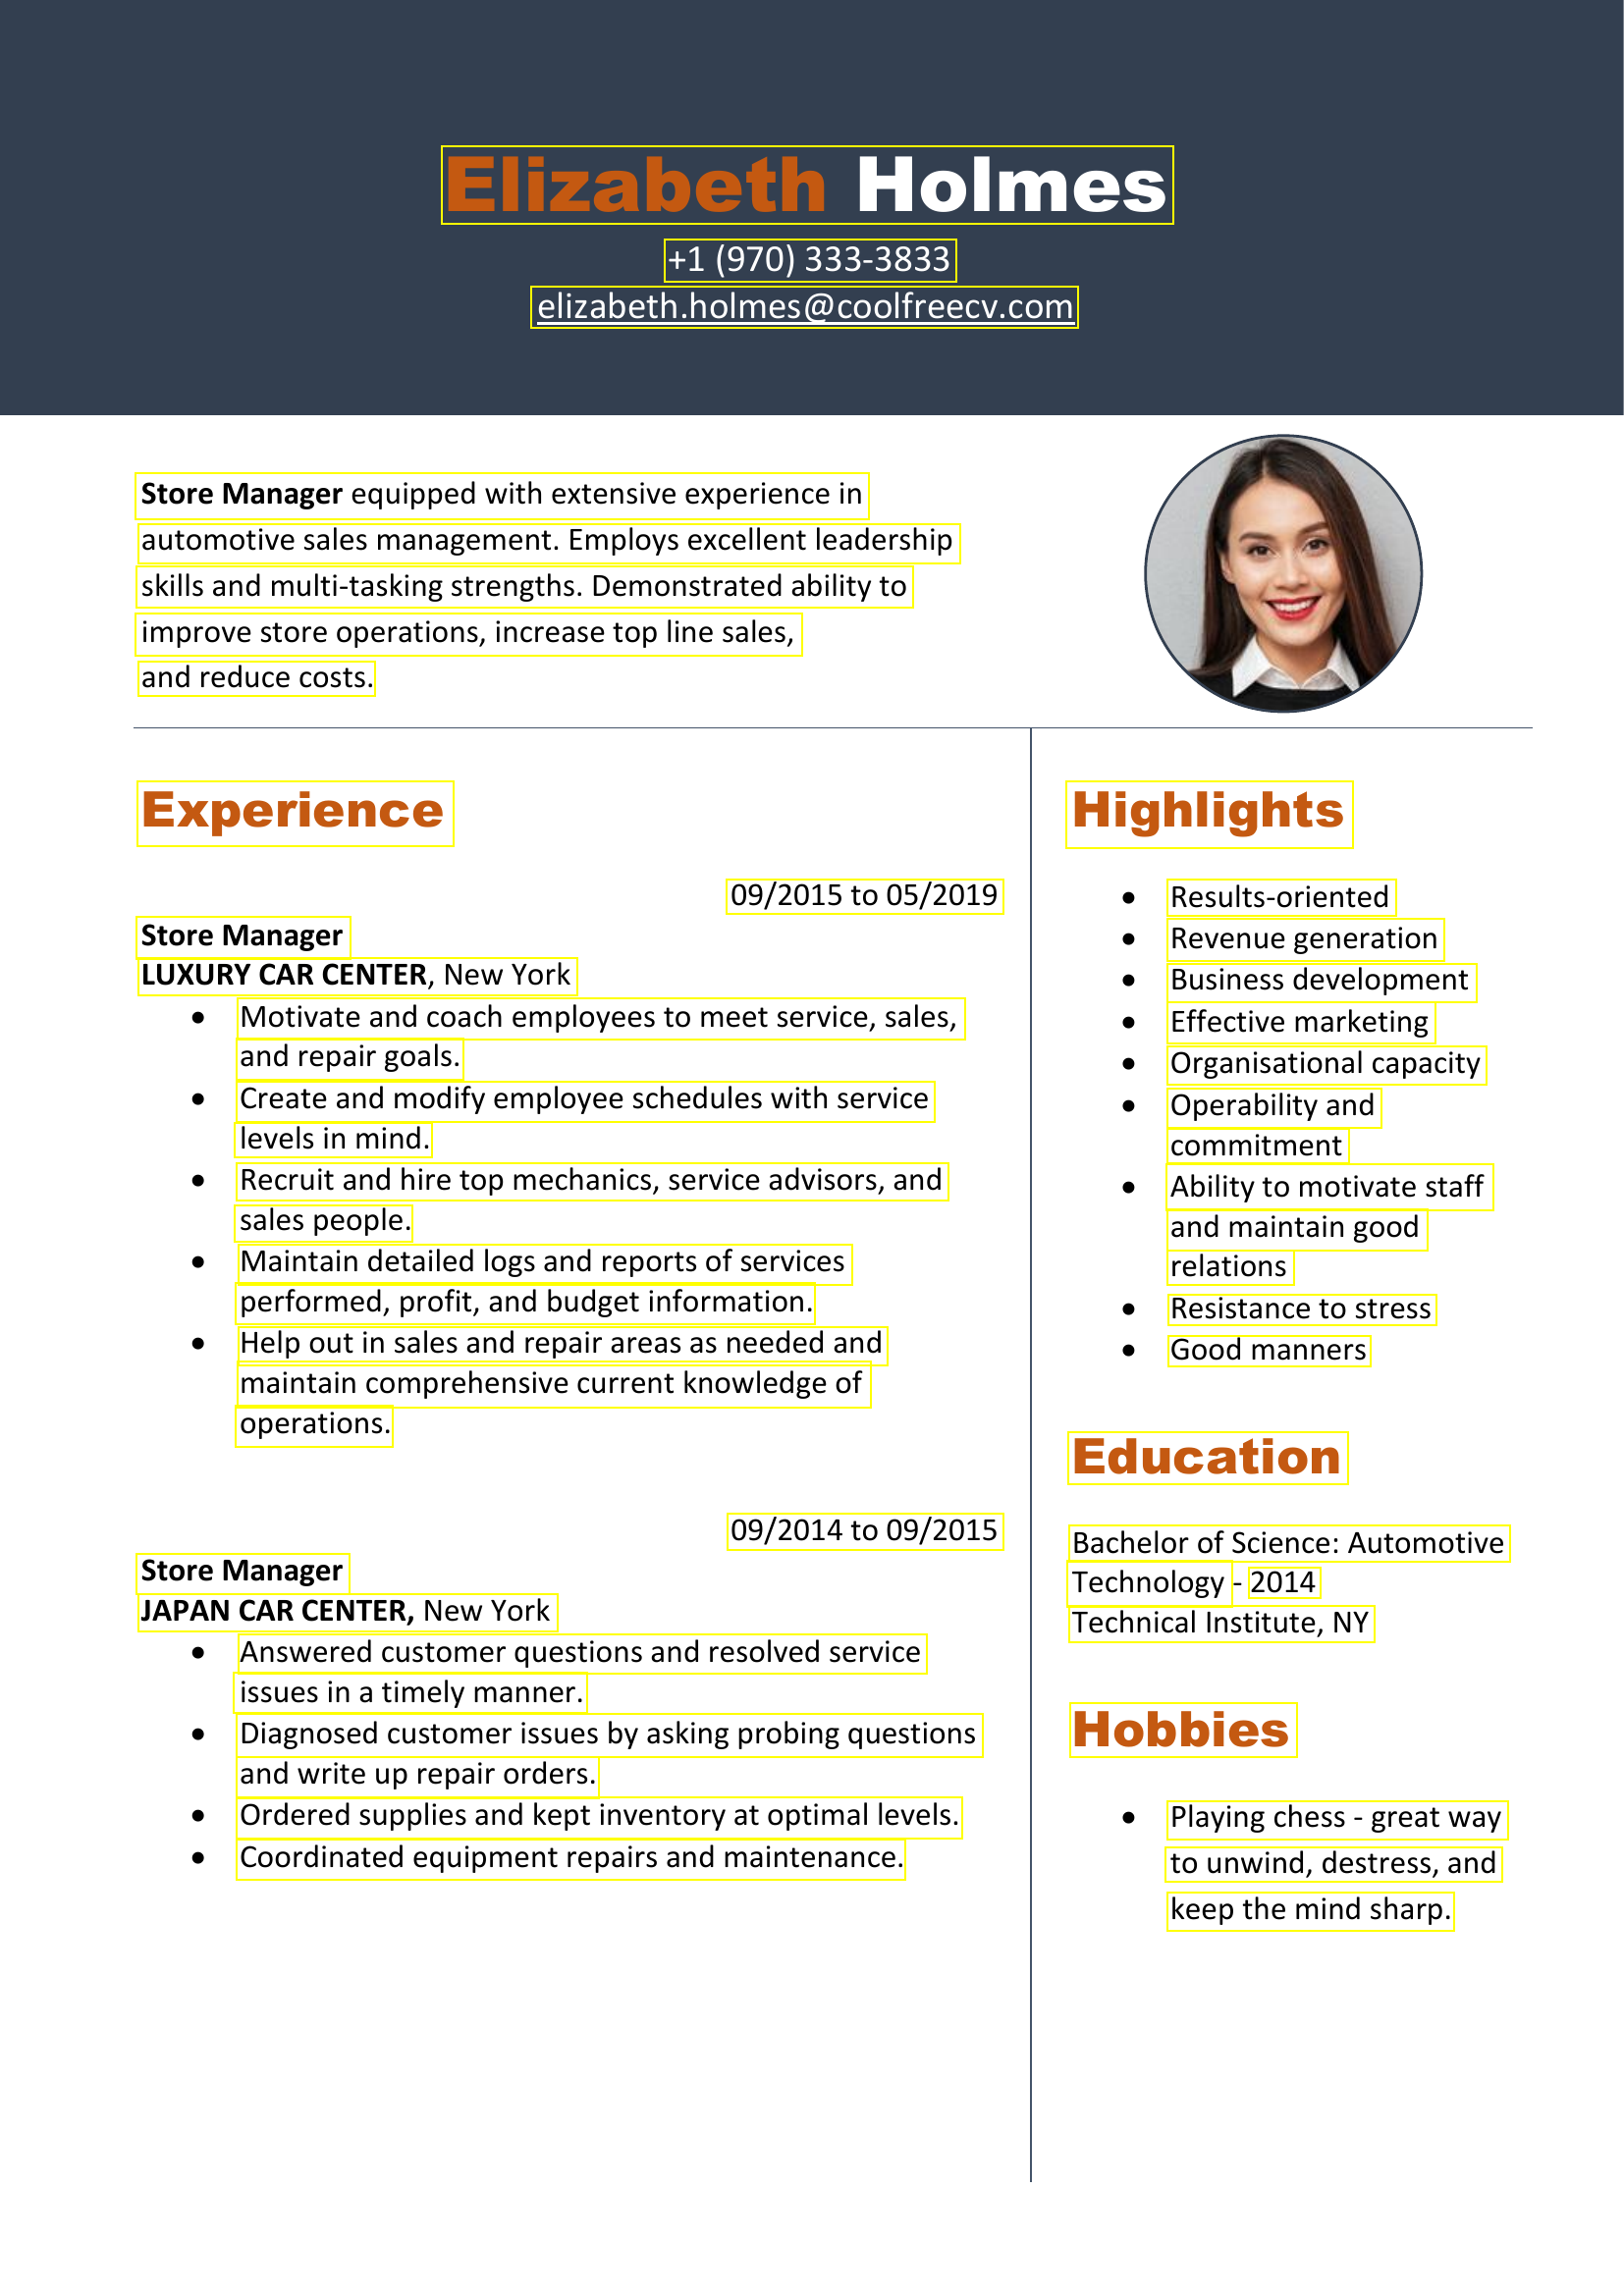

In [74]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

#### Displaying all the texts

In [75]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Elizabeth Holmes
+1 (970) 333-3833
elizabethholmes@coolfreecv com
Store Manager equipped with extensive experience in
automotive sales management: Employs excellent leadership
skills and multi-tasking strengths Demonstrated ability to
improve store operations, increase top line sales,
and reduce costs.
Experience
Highlights
09/2015 to 05/2019
Results-oriented
Store Manager
Revenue generation
LUXURY CAR CENTER, New York
Business development
Motivate and coach employees to meet service, sales,
Effective marketing
and repair goals.
Organisational capacity
Create and modify employee schedules with service
Operability and
levels in mind:
commitment
Recruit and hire top mechanics, service advisors, and
Ability to motivate staff
sales people:
and maintain good
Maintain detailed logs and reports of services
relations
performed, profit, and budget information:
Resistance to stress
Help out in sales and repair areas as needed and
Good manners
maintain comprehensive current knowledge of
operation

In [76]:
nlp=spacy.load('en_core_web_sm')

In [77]:
doc = nlp(text)

#### Displaying info

In [78]:
from spacy import displacy
displacy.render(nlp(doc.text),style='ent', jupyter=True)